<a href="https://colab.research.google.com/github/mauryasameer/LJMU_COHORT_13/blob/main/Copy_of_COMPARITIVE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing imp libs

In [ ]:
!pip install datasets
!mkdir MODEL
!pip install jupyter_dash
!pip install pyyaml==5.4.1
# !pip install 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 5.1 MB/s 
     |████████████████████████████████| 212 kB 44.7 MB/s 
     |████████████████████████████████| 182 kB 71.4 MB/s 
     |████████████████████████████████| 115 kB 70.3 MB/s 
     |████████████████████████████████| 127 kB 73.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 8.0 MB/s 
     |████████████████████████████████| 1.6 MB 49.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 5.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Unin

In [ ]:
!pip install pyspark
!pip install joblibspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 37 kB/s 
     |████████████████████████████████| 199 kB 48.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=2f2eddd9b47bad27b4917e0b40cd15ce453a7331884681c0531d8ed93ce45c6a
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing Libs

In [ ]:
from sklearn.utils import parallel_backend
from joblibspark import register_spark
register_spark()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from datasets import load_dataset

import requests
import json

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
import pickle

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.layers import Layer
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras as keras

from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly
import plotly.graph_objs as go
import plotly.express as px

from sklearn import metrics
import seaborn as sns
import re

from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`


# Setting up different dataset

### Banking 77

In [ ]:
banking_data = load_dataset('banking77',data_dir='.')

Generating train split:   0%|          | 0/10003 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3080 [00:00<?, ? examples/s]

Dataset banking77 downloaded and prepared to /root/.cache/huggingface/datasets/banking77/default-data_dir=./1.1.0/ff44c4421d7e70aa810b0fa79d36908a38b87aff8125d002cd44f7fcd31f493c. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
banking_training_text = banking_data['train']['text']
banking_training_label = banking_data['train']['label']
banking_testing_text = banking_data['test']['text']
banking_testing_label = banking_data['test']['label']

In [ ]:
bank_train_df = pd.DataFrame({"text":banking_training_text, "labels":banking_training_label})
bank_test_df = pd.DataFrame({"text":banking_testing_text, "labels":banking_testing_label})

In [ ]:
# bank_train_df.iloc[:,0]

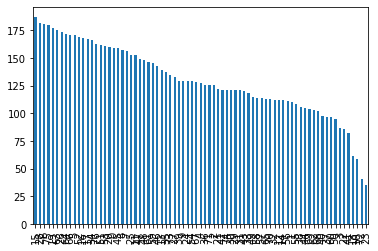

In [ ]:
bank_train_df.labels.value_counts().plot.bar()

### CLINC

In [ ]:
url = 'https://raw.githubusercontent.com/clinc/oos-eval/master/data/data_imbalanced.json'
resp = requests.get(url)
clinc_data = json.loads(resp.text)

In [ ]:
clinc_data.keys()

dict_keys(['oos_val', 'val', 'train', 'oos_test', 'test', 'oos_train'])

In [ ]:
clinc_train=pd.DataFrame(np.asarray(clinc_data['train']), columns=['text','labels'])
clinc_test=pd.DataFrame(np.asarray(clinc_data['test']), columns=['text','labels'])
clinc_val=pd.DataFrame(np.asarray(clinc_data['val']), columns=['text','labels'])

In [ ]:
clinc_train_oos=pd.DataFrame(np.asarray(clinc_data['oos_train']), columns=['text','labels'])
clinc_test_oos=pd.DataFrame(np.asarray(clinc_data['oos_test']), columns=['text','labels'])
clinc_val_oos=pd.DataFrame(np.asarray(clinc_data['oos_val']), columns=['text','labels'])

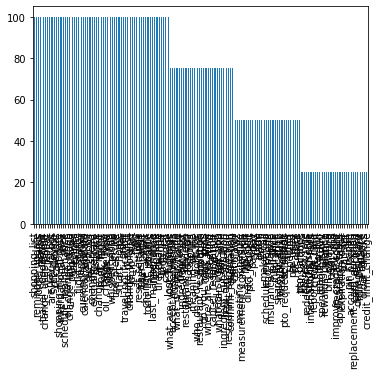

In [ ]:
clinc_train.labels.value_counts().plot.bar()

### Live data

In [ ]:
live_data=pd.read_csv('/content/drive/MyDrive/VF_MODELS/Data/final_full.csv')

In [ ]:
count_live= pd.DataFrame(live_data.intent_id.value_counts())

In [ ]:
inx_live=count_live[count_live['intent_id']>15].index

In [ ]:
live_data = live_data[live_data['intent_id'].isin(inx_live)]

In [ ]:
live_data

intent_id  \
0      5b0ce84b807c0a7b35962914   
1      5b0ce84b807c0a7b35962914   
2      5b0ce84b807c0a7b35962914   
3      5b0ce84b807c0a7b35962914   
4      5b0ce84b807c0a7b35962914   
...                         ...   
10442  5de4fff4807c0a053d65f96c   
10443  5de4fff4807c0a053d65f96c   
10444  5de4fff4807c0a053d65f96c   
10445  5de4fff4807c0a053d65f96c   
10446  5de4fff4807c0a053d65f96c   

                                                  phases  
0           I would like to know the role of VFS Global?  
1                                               Why VFS?  
2      are you a consultancy service? do you charge f...  
3                          are you a consultancy service  
4                                What does VFS Global do  
...                                                  ...  
10442                 Can u tell me about sub class visa  
10443  I would like to immigrate to Australia what th...  
10444  I am trying to identify the correct subclass. ...  
10445                         All groups- Visa Finder-40  
10446  I got a job in Australia for  four years. It i...  

[6510 rows x 2 columns]

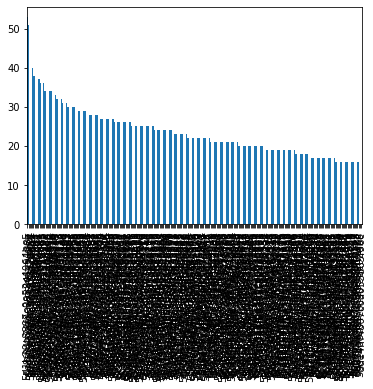

In [ ]:
live_data.intent_id.value_counts().plot.bar()

### Small Sample

In [ ]:
small_data=pd.read_csv('/content/drive/MyDrive/VF_MODELS/Data/json_data.csv')

In [ ]:
small_data

Intents  class
0                             Hi      2
1                    How are you      2
2               Is anyone there?      2
3                          Hello      2
4                       Good day      2
5                       Whats up      2
6                            cya      1
7                  See you later      1
8                        Goodbye      1
9                   I am Leaving      1
10               Have a Good day      1
11                       how old      0
12                how old is tim      0
13              what is your age      0
14               how old are you      0
15                          age?      0
16             what is your name      4
17        what should I call you      4
18              whats your name?      4
19      Id like to buy something      5
20             whats on the menu      5
21       what do you reccommend?      5
22  could i get something to eat      5
23        when are you guys open      3
24           what are your hours      3
25            hours of operation      3

### HINT3 dataset

In [ ]:
tr_data_1 = pd.read_csv('https://raw.githubusercontent.com/hellohaptik/HINT3/master/dataset/v2/train/curekart_train.csv')
tr_data_2 = pd.read_csv('https://raw.githubusercontent.com/hellohaptik/HINT3/master/dataset/v2/train/powerplay11_train.csv')
tr_data_3 = pd.read_csv('https://raw.githubusercontent.com/hellohaptik/HINT3/master/dataset/v2/train/sofmattress_train.csv')

tes_data_1 = pd.read_csv('https://raw.githubusercontent.com/hellohaptik/HINT3/master/dataset/v2/test/curekart_test.csv')
tes_data_2 = pd.read_csv('https://raw.githubusercontent.com/hellohaptik/HINT3/master/dataset/v2/test/powerplay11_test.csv')
tes_data_3 = pd.read_csv('https://raw.githubusercontent.com/hellohaptik/HINT3/master/dataset/v2/test/sofmattress_test.csv')

In [ ]:
haptik_train = pd.concat([tr_data_1, tr_data_2, tr_data_3]).drop(['Unnamed: 2'], axis=1).reset_index(drop=True)

In [ ]:
haptik_test = pd.concat([tes_data_1, tes_data_2, tes_data_3]).reset_index(drop=True)

In [ ]:
haptik_test.label.value_counts()

NO_NODES_DETECTED       1350
RECOMMEND_PRODUCT        205
CHECK_PINCODE             47
ORIGINAL_PRODUCT          43
CHAT_WITH_AN_AGENT        38
                        ... 
DOWNLOAD_POWERPLAY11       1
WITHDRAW_CASH_BONUS        1
ACCOUNT_RESET              1
UPDATE_APP                 1
APPRECIATION               1
Name: label, Length: 93, dtype: int64

In [ ]:
haptik_train.label.value_counts()

RECOMMEND_PRODUCT               95
ORDER_STATUS                    68
REFUNDS_RETURNS_REPLACEMENTS    54
RESUME_DELIVERY                 51
CHAT_WITH_AN_AGENT              42
                                ..
CASH_BONUS_EXPIRY                1
SIGNUP_BONUS                     1
WRONG_SCORES                     1
WITHDRAW_CASH_BONUS              1
CASH_BONUS                       1
Name: label, Length: 103, dtype: int64

In [ ]:
counts=pd.DataFrame(haptik_train.label.value_counts())
useful_intents = list(counts[counts['label']>5].index)

In [ ]:
haptik_train=haptik_train[haptik_train['label'].isin(useful_intents)]
haptik_test=haptik_test[haptik_test['label'].isin(useful_intents)]

In [ ]:
intesection=list(set(haptik_test.label).intersection(set(haptik_train.label)))

In [ ]:
haptik_train=haptik_train[haptik_train['label'].isin(intesection)]
haptik_test=haptik_test[haptik_test['label'].isin(intesection)]

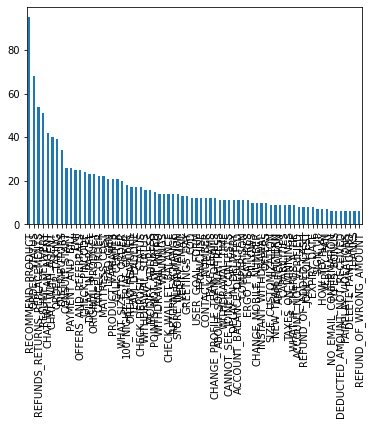

In [ ]:
haptik_train.label.value_counts().plot.bar()

### HWU

In [ ]:
HWU = load_dataset("cbrew475/hwu66")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset hwu66 downloaded and prepared to /root/.cache/huggingface/datasets/cbrew475___hwu66/default/1.1.0/c8affceef929600f95adf9af9114adf7e4f082aad4d76919da21c56e1ce8e66c. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
HWU

DatasetDict({
    train: Dataset({
        features: ['answerid', 'scenario', 'intent', 'label', 'text'],
        num_rows: 21716
    })
    test: Dataset({
        features: ['answerid', 'scenario', 'intent', 'label', 'text'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['answerid', 'scenario', 'intent', 'label', 'text'],
        num_rows: 2000
    })
})

In [ ]:
hwu_train_df = pd.DataFrame({"Intents":HWU['train']['text'], "label":HWU['train']['label']})
hwu_test_df = pd.DataFrame({"Intents":HWU['test']['text'], "label":HWU['test']['label']})
hwu_val_df = pd.DataFrame({"Intents":HWU['validation']['text'], "label":HWU['validation']['label']})

In [ ]:
hwu_train_df.label.nunique()

68

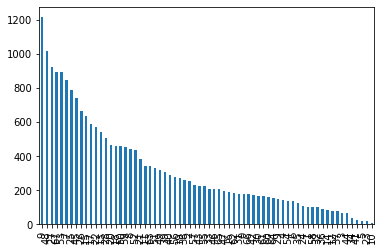

In [ ]:
hwu_train_df.label.value_counts().plot.bar()

### BENCHMARK DATASET

In [ ]:
# json.loads(open('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2016-12-built-in-intents/benchmark_data.json', 'rb'))

In [ ]:
# pd.read_json('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2016-12-built-in-intents/benchmark_data.json')['domains'].values[0]['intents'][1]

### Few shot data

In [ ]:
fewshot_data_test = pd.read_csv('https://raw.githubusercontent.com/koushikkonwar/Few-Shot-/master/Dataset/final_fewshot_test.csv')
fewshot_data_train = pd.read_csv('https://raw.githubusercontent.com/koushikkonwar/Few-Shot-/master/Dataset/final_fewshot_train.csv')

In [ ]:
fewshot_data_test

Unnamed: 0                                               text  class
0            122  ApiServer: Fix apidiscovery fail case, fix com...      1
1           1840  [GSCOLLECT-1606] Improve primitive map perform...      5
2           1553        Big rename and more pointcut features in UI      4
3           2475  Network-refactor: fix bugs in components.xml d...      1
4            515  HADOOP-10659. Refactor AccessControlList to re...      5
...          ...                                                ...    ...
3272        2318   [JENKINS-35020] Fixed some JSHint errors (#2368)      1
3273        3349  update feature #3145, Improve code and improve...      3
3274        1656                   [ALLUXIO-2743] Fix failing tests      1
3275        1421  HIVE-5951 : improve performance of adding part...      5
3276        2476  Change zadd parameter order to allow duplicate...      2

[3277 rows x 3 columns]

In [ ]:
fewshot_data_train

Unnamed: 0                                               text  class
0           34              [ALLUXIO-2743] Fix failing unit tests      1
1         2935                #2 Refactored structure of Argument      3
2           84            Remove some features from JwtTokenStore      4
3           42     Remove duplicated 1.613 section from changelog      2
4         2948                     * webapp structure refactoring      3
..         ...                                                ...    ...
95          44                      Tiny performance improvement.      5
96         170   Remove duplicate code and dependency on metadata      2
97          36                    #691 - Performance Improvements      5
98        2936  #204 refactored DB structure to deal with priv...      3
99         253  No need to duplicate close method as it's alre...      2

[100 rows x 3 columns]

### NLU BENCMARK

In [ ]:
import requests

In [ ]:
getWeather_train = json.loads(requests.get('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2017-06-custom-intent-engines/GetWeather/train_GetWeather_full.json').content.decode())
getWeather_test = json.loads(requests.get('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2017-06-custom-intent-engines/GetWeather/validate_GetWeather.json').content)

SearchScreeing_train = json.loads(requests.get('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2017-06-custom-intent-engines/SearchScreeningEvent/train_SearchScreeningEvent_full.json').content)
SearchScreeing_test = json.loads(requests.get('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2017-06-custom-intent-engines/SearchScreeningEvent/validate_SearchScreeningEvent.json').content)

AddToPlaylist_train = json.loads(requests.get('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2017-06-custom-intent-engines/AddToPlaylist/train_AddToPlaylist_full.json').content.decode())
AddToPlaylist_test = json.loads(requests.get('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2017-06-custom-intent-engines/AddToPlaylist/validate_AddToPlaylist.json').content)

BookRestraunt_train = json.loads(requests.get('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2017-06-custom-intent-engines/BookRestaurant/train_BookRestaurant_full.json').content)
BookRestraunt_test = json.loads(requests.get('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2017-06-custom-intent-engines/BookRestaurant/validate_BookRestaurant.json').content)


PlayMusic_train = json.loads(requests.get('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2017-06-custom-intent-engines/PlayMusic/train_PlayMusic_full.json').content)
PlayMusic_test = json.loads(requests.get('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2017-06-custom-intent-engines/PlayMusic/validate_PlayMusic.json').content)

RateBook_train = json.loads(requests.get('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2017-06-custom-intent-engines/RateBook/train_RateBook_full.json').content)
RateBook_test = json.loads(requests.get('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2017-06-custom-intent-engines/RateBook/validate_RateBook.json').content)

SearchCreativeWork_train = json.loads(requests.get('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2017-06-custom-intent-engines/SearchCreativeWork/train_SearchCreativeWork_full.json').content)
SearchCreativeWork_test = json.loads(requests.get('https://raw.githubusercontent.com/sonos/nlu-benchmark/master/2017-06-custom-intent-engines/SearchCreativeWork/validate_SearchCreativeWork.json').content)

In [ ]:
def create_data(data):
    initial_key = list(data.keys())[0]

    all_extracted_data = data[initial_key]
    all_text = []
    for intent_bunch in all_extracted_data:
        intent_bunch_text = []
        for line_text in intent_bunch['data']:
            # print(line_text)
            intent_bunch_text.append(line_text['text'])
        final_text = " ".join(intent_bunch_text)
        all_text.append(final_text)
    
    final_df = pd.DataFrame(all_text, columns=['text'])
    final_df['intent'] = initial_key

    return final_df

In [ ]:
SearchScreeing_train_df = create_data(SearchScreeing_train)
SearchCreativeWork_train_df = create_data(SearchCreativeWork_train)
RateBook_train_df = create_data(RateBook_train)
getWeather_train_df = create_data(getWeather_train)
AddToPlaylist_train_df = create_data(AddToPlaylist_train)
BookRestraunt_train_df = create_data(BookRestraunt_train)
PlayMusic_train_df = create_data(PlayMusic_train)

SearchScreeing_test_df = create_data(SearchScreeing_test)
SearchCreativeWork_test_df = create_data(SearchCreativeWork_test)
RateBook_test_df = create_data(RateBook_test)
getWeather_test_df = create_data(getWeather_test)
AddToPlaylist_test_df = create_data(AddToPlaylist_test)
BookRestraunt_test_df = create_data(BookRestraunt_test)
PlayMusic_test_df = create_data(PlayMusic_test)

In [ ]:
amazon_train = SearchScreeing_train_df.append([SearchCreativeWork_train_df, RateBook_train_df, getWeather_train_df, AddToPlaylist_train_df, BookRestraunt_train_df, PlayMusic_train_df], ignore_index=True)
amazon_test = SearchScreeing_test_df.append([SearchCreativeWork_test_df, RateBook_test_df, getWeather_test_df, AddToPlaylist_test_df, BookRestraunt_test_df, PlayMusic_test_df], ignore_index=True)

In [ ]:
amazon_train.describe()

text      intent
count                     13784       13784
unique                    13623           7
top     Find  movie schedules .  GetWeather
freq                          9        2000

In [ ]:
amazon_train.head()

text                intent
0   What are the  movie schedule  at  Malco Theatres  SearchScreeningEvent
1                  I want to get the  movie schedule  SearchScreeningEvent
2  Show me movie time for  I Am Sorry   at my  mo...  SearchScreeningEvent
3  Find time for  Trouble for Two   in one minute...  SearchScreeningEvent
4  Please show me the  movie schedule  for  movie...  SearchScreeningEvent

In [ ]:
amazon_train['text'] = amazon_train['text'].apply(lambda x:x.encode('ascii', 'ignore').decode())

In [ ]:
amazon_train.intent.value_counts()

GetWeather              2000
PlayMusic               2000
BookRestaurant          1973
SearchScreeningEvent    1959
RateBook                1956
SearchCreativeWork      1954
AddToPlaylist           1942
Name: intent, dtype: int64

In [ ]:
amazon_train_95, amazon_test_95 =  train_test_split(amazon_train, test_size=.01, random_state=42)

In [ ]:
amazon_test_95.intent.value_counts()

GetWeather              26
BookRestaurant          23
PlayMusic               20
RateBook                19
SearchScreeningEvent    18
SearchCreativeWork      17
AddToPlaylist           15
Name: intent, dtype: int64

# loading embeddings

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
embed = hub.load(module_url)

# Visulization of vectors

In [ ]:
bank_tfidf = TfidfVectorizer(ngram_range=(1,3), stop_words='english')
bank_vc = bank_tfidf.fit_transform(bank_train_df['text'])
bank_vc = bank_vc.todense()

In [ ]:
# X_embedded = TSNE(n_components=2).fit_transform(bank_vc)

# plt.figure(figsize=(10,10))

# for i, t in enumerate(set(bank_train_df['labels'])):
#     idx = bank_train_df['labels'] == t
#     plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=t)   

# plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
# bank_vec = embed(bank_train_df['text'])

In [ ]:

# X_embedded_ = TSNE(n_components=2).fit_transform(bank_vec)

# plt.figure(figsize=(10,10))

# for i, t in enumerate(set(bank_train_df['labels'])):
#     idx = bank_train_df['labels'] == t
#     plt.scatter(X_embedded_[idx, 0], X_embedded_[idx, 1], label=t)   

# plt.legend(bbox_to_anchor=(1, 1))

In [ ]:
def plotting_vectors(data, indp, target, USE):

    if USE:
        vec = embed(data[indp].values)
    else:
        data_tfidf = TfidfVectorizer(ngram_range=(1,3), stop_words='english')
        data_vec = data_tfidf.fit_transform(data[indp])
        vec = data_vec.todense()

    X_embedded_ = TSNE(n_components=2).fit_transform(vec)

    plt.figure(figsize=(10,10))

    for i, t in enumerate(set(data[target])):
        idx = data[target] == t
        plt.scatter(X_embedded_[idx, 0], X_embedded_[idx, 1], label=t)   

    # plt.legend(bbox_to_anchor=(1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


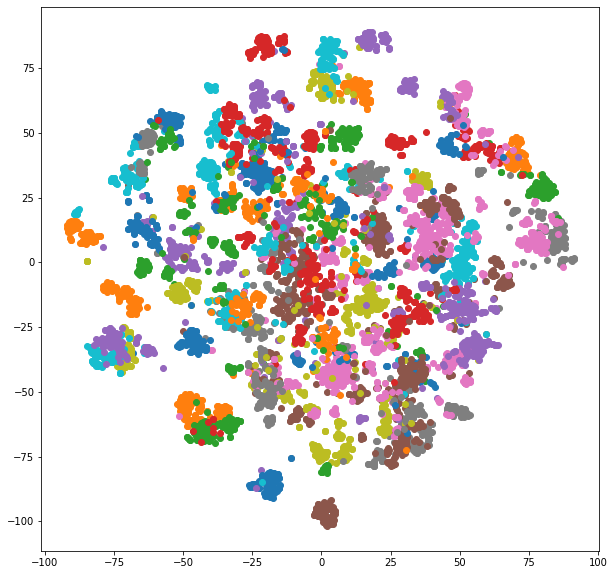

In [ ]:
plotting_vectors(bank_train_df, 'text', 'labels', True)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


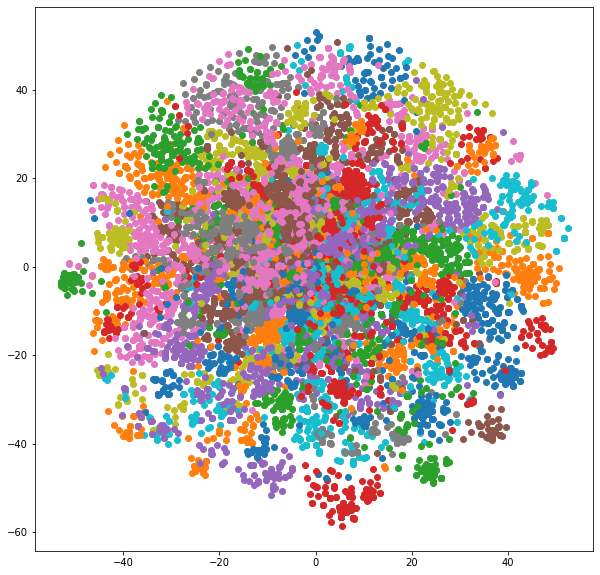

In [ ]:
plotting_vectors(bank_train_df, 'text', 'labels', False)

In [ ]:
# plotting_vectors(fewshot_data_train, 'text', 'class', False)

In [ ]:
# plotting_vectors(fewshot_data_train, 'text', 'class', True)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


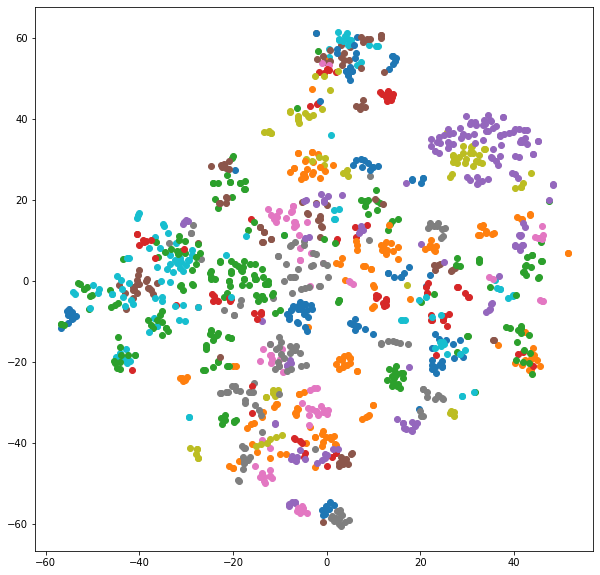

In [ ]:
plotting_vectors(haptik_train, 'sentence', 'label', True)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


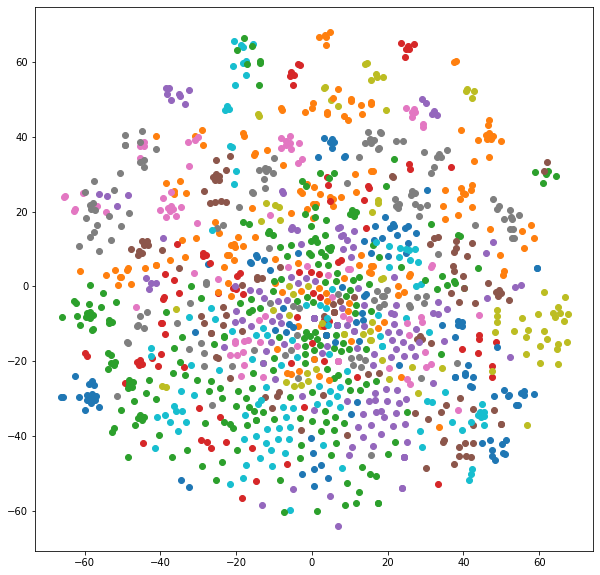

In [ ]:
plotting_vectors(haptik_train, 'sentence', 'label', False)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


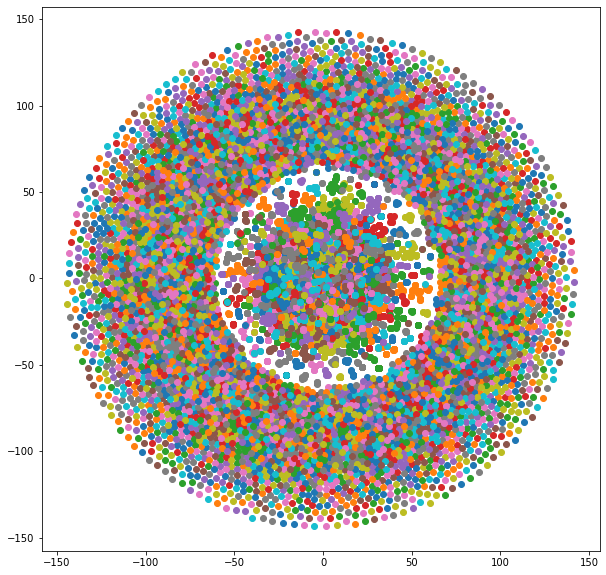

In [ ]:
plotting_vectors(clinc_train, 'text', 'labels', False)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


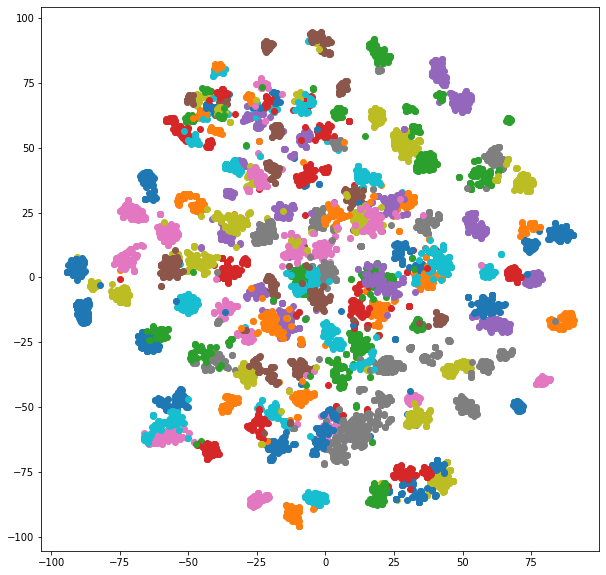

In [ ]:
plotting_vectors(clinc_train, 'text', 'labels', True)

# Building the trainer classes

In [ ]:
def plot_metrics(y_test, predicted, predicted_prob):
    
    c_count = len(np.unique(y_test))

    classes = np.unique(y_test)
    y_test_array = pd.get_dummies(y_test, drop_first=False).values
    # plt.figure(figsize=[10,10], dpi=90)
    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test, predicted)
    if c_count==2:
        auc = metrics.roc_auc_score(y_test, predicted_prob[:,1])    
    else:
        auc = metrics.roc_auc_score(y_test, predicted_prob, 
                                multi_class="ovr")
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))
        
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots(figsize=(10,10))
    
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
        yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
    
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                            predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
                label='{0} (area={1:0.2f})'.format(classes[i], 
                                metrics.auc(fpr, tpr))
                )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
            xlabel='False Positive Rate', 
            ylabel="True Positive Rate (Recall)", 
            title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)
        
    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                    y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                label='{0} (area={1:0.2f})'.format(classes[i], 
                                    metrics.auc(recall, precision))
                )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
            ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    
    plt.show()

In [ ]:
class BaseModel():

    def __init__(self, train, test, val, target, indp):
        
        self.vec = TfidfVectorizer(ngram_range=(1,3), stop_words='english')
        self.model = SVC(C=5,probability=True)
        self.train_X = train[indp]
        self.train_y = train[target]
        self.test = test
        if self.test is not None:    
            self.test_X = test[indp]
            self.test_y = test[target]
        self.val = val
        if self.val is not None:
            self.val_X = val[indp]
            self.val_y = val[target]
        self.le = LabelEncoder()


    def train_vect(self):
        op = {}
        self.train_vec = self.vec.fit_transform(self.train_X)
        op['train']=self.train_vec
        if self.test is not None:
            self.test_vec = self.vec.transform(self.test_X)
            op['test']=self.test_vec
        if self.val is not None:
            self.val_vec = self.vec.transform(self.val_X)
            op['val']=self.val_vec
        return op

    def train_model(self):
        
        self.model.fit(self.train_vec, self.train_y)
    
    def print_performace(self):
        
        pred_train = self.model.predict(self.train_vec)
        preds_train_proba = self.model.predict_proba(self.train_vec)

        print("="*10, 'TRAINING REPORT', "="*10)
        print(accuracy_score(self.train_y, pred_train))
        print(f1_score(self.train_y, pred_train, average='weighted'))
        print(matthews_corrcoef(self.train_y, pred_train))
        plot_metrics(self.train_y, pred_train, preds_train_proba)

        if self.test is not None:
            preds_test = self.model.predict(self.test_vec)
            preds_test_proba = self.model.predict_proba(self.test_vec)
            print("="*10, 'TESTING REPORT', "="*10)
            print(accuracy_score(self.test_y, preds_test))
            print(f1_score(self.test_y, preds_test, average='weighted'))
            print(matthews_corrcoef(self.test_y, preds_test))
            plot_metrics(self.test_y, preds_test, preds_test_proba)
            
        if self.val is not None:
            preds_val = self.model.predict(self.val_vec)
            preds_val_proba = self.model.predict_proba(self.val_vec)
            print("="*10, 'VALIDATION REPORT', "="*10)
            print(accuracy_score(self.val_y, preds_val))
            print(f1_score(self.val_y, preds_val, average='weighted'))
            print(matthews_corrcoef(self.val_y, preds_val))
            plot_metrics(self.val_y, preds_val, preds_val_proba)

    def print_performace(self):
        
        pred_train = self.model.predict(self.train_vec)
        preds_train_proba = self.model.predict_proba(self.train_vec)

        print("="*10, 'TRAINING REPORT', "="*10)
        print(accuracy_score(self.train_y, pred_train))
        print(f1_score(self.train_y, pred_train, average='weighted'))
        print(matthews_corrcoef(self.train_y, pred_train))
        plot_metrics(self.train_y, pred_train, preds_train_proba)

        if self.test is not None:
            preds_test = self.model.predict(self.test_vec)
            preds_test_proba = self.model.predict_proba(self.test_vec)
            print("="*10, 'TESTING REPORT', "="*10)
            print(accuracy_score(self.test_y, preds_test))
            print(f1_score(self.test_y, preds_test, average='weighted'))
            print(matthews_corrcoef(self.test_y, preds_test))
            plot_metrics(self.test_y, preds_test, preds_test_proba)
            
        if self.val is not None:
            preds_val = self.model.predict(self.val_vec)
            preds_val_proba = self.model.predict_proba(self.val_vec)
            print("="*10, 'VALIDATION REPORT', "="*10)
            print(accuracy_score(self.val_y, preds_val))
            print(f1_score(self.val_y, preds_val, average='weighted'))
            print(matthews_corrcoef(self.val_y, preds_val))
            plot_metrics(self.val_y, preds_val, preds_val_proba)
    
    
    def driver(self, model_name):
        print("="*10, 'TRAINING VECTORS', "="*10)
        self.train_vect()
        print("="*10, 'TRAINING MODEL', "="*10)
        self.train_model()
        self.print_performace()
        print("="*10, 'EXPORTING MODEL', "="*10)
        pickle.dump(self.model, open(f"MODEL/{model_name}.pickle", 'wb'))

# testing the lazy predict to check multiple model

In [ ]:
# pip install lazypredict

In [ ]:
# from lazypredict.Supervised import LazyClassifier

In [ ]:
import warnings
import xgboost
from sklearn.base import ClassifierMixin
from tqdm import tqdm_notebook as tq
# import catboost
import lightgbm
import time

warnings.filterwarnings("ignore")
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [ ]:
from sklearn.utils import all_estimators

In [ ]:
removed_classifiers = [
    "ClassifierChain",
    "ComplementNB",
    "GradientBoostingClassifier",
    "GaussianProcessClassifier",
    "HistGradientBoostingClassifier",
    "MLPClassifier",
    "LogisticRegressionCV", 
    "MultiOutputClassifier", 
    "MultinomialNB", 
    "OneVsOneClassifier",
    "OneVsRestClassifier",
    "OutputCodeClassifier",
    "RadiusNeighborsClassifier",
    "VotingClassifier",
]

In [ ]:
CLASSIFIERS = [
    est
    for est in all_estimators()
    if (issubclass(est[1], ClassifierMixin) and (est[0] not in removed_classifiers))
]
CLASSIFIERS.append(("XGBClassifier", xgboost.XGBClassifier))
CLASSIFIERS.append(("LGBMClassifier", lightgbm.LGBMClassifier))

In [ ]:
class TrainMultiple:

    def __init__(self, train, test, val, target, indp, embedding_type='tfidf'):
        self.embedding_type = embedding_type
        
        # self.model = SVC(C=5,probability=True)
        self.train_X = train[indp]
        self.train_y = train[target]
        self.metrics_train = {}
        self.metrics_train['accuracy'] = []
        self.metrics_train['F1-Score'] = []
        self.metrics_train['MCC'] = []
        self.metrics_train['Time'] = []

        self.test = test
        if self.test is not None:    
            self.test_X = test[indp]
            self.test_y = test[target]
            self.metrics_test = {}
            self.metrics_test['accuracy'] = []
            self.metrics_test['F1-Score'] = []
            self.metrics_test['MCC'] = []
            # self.metrics_test['Time'] = []
        self.val = val
        if self.val is not None:
            self.val_X = val[indp]
            self.val_y = val[target]
            self.metrics_val = {}
            self.metrics_val['accuracy'] = []
            self.metrics_val['F1-Score'] = []
            self.metrics_val['MCC'] = []
            # self.metrics_val['Time'] = []
        
        
        if embedding_type == 'tfidf':
            self.vec = TfidfVectorizer(ngram_range=(1,3), stop_words='english')
            vecs = self._train_vect_TFIDF()
        elif embedding_type == 'USE':
            self.vec = embed
            vecs = self._train_vect_USE()


        self.le = LabelEncoder()
        self.trained_models = []

        
    def _train_vect_TFIDF(self):
        op = {}
        self.train_vec = self.vec.fit_transform(self.train_X)
        op['train']=self.train_vec
        if self.test is not None:
            self.test_vec = self.vec.transform(self.test_X)
            op['test']=self.test_vec
        if self.val is not None:
            self.val_vec = self.vec.transform(self.val_X)
            op['val']=self.val_vec
        return op

    def _train_vect_USE(self):
        try:
            self.train_vec = self.vec(self.train_X).numpy()
            if self.test is not None:
                self.test_vec = self.vec(self.test_X).numpy()
            if self.val is not None:
                self.val_vec = self.vec(self.val_X).numpy()
        except Exception as e:
            print('Umable to Train because of', e)
    
    def train(self):

        for name, model in tq(CLASSIFIERS):
            
            try:
                start = time.time()
                model = model() 
                model.fit(X=self.train_vec,y= self.train_y)
                end = time.time() - start
                y_preds_train = model.predict(self.train_vec)
                accuracy, f1, mcc = self.get_performace(self.train_y,
                                                        y_preds_train)
                self.metrics_train['accuracy'].append(accuracy)
                self.metrics_train['F1-Score'].append(f1)
                self.metrics_train['MCC'].append(mcc)
                self.metrics_train['Time'].append(end)
                
                    

                if self.val is not None:
                    y_preds_val = model.predict(self.val_vec)
                    accuracy, f1, mcc = self.get_performace(self.val_y,
                                                            y_preds_val)
                    self.metrics_val['accuracy'].append(accuracy)
                    self.metrics_val['F1-Score'].append(f1)
                    self.metrics_val['MCC'].append(mcc)

                if self.test is not None:
                    y_preds_test = model.predict(self.test_vec)
                    accuracy, f1, mcc = self.get_performace(self.test_y,
                                                            y_preds_test)
                    self.metrics_test['accuracy'].append(accuracy)
                    self.metrics_test['F1-Score'].append(f1)
                    self.metrics_test['MCC'].append(mcc)
                    
                self.trained_models.append(name)
            except Exception as e:
                print(e)
                pass
        response = []
        train_performance_df = pd.DataFrame(self.metrics_train, index=self.trained_models).sort_values(by=['accuracy',
                                                                                                           'F1-Score',
                                                                                                           'MCC',
                                                                                                           'Time'],
                                                                                                        ascending=False)
        response.append(train_performance_df)
        if self.test is not None:
            test_performance_df = pd.DataFrame(self.metrics_test, index=self.trained_models).sort_values(by=['accuracy',
                                                                                                             'F1-Score',
                                                                                                             'MCC'],
                                                                                                          ascending=False)
            response.append(test_performance_df)
        if self.val is not None:
            val_performance_df = pd.DataFrame(self.metrics_val, index=self.trained_models).sort_values(by=['accuracy',
                                                                                                           'F1-Score',
                                                                                                           'MCC',
                                                                                                           ],
                                                                                                        ascending=False)
            response.append(val_performance_df)
        
        return response
    
    def get_performace(self, y, preds):
        
        # pred_train = self.model.predict(self.train_vec)
        # preds_train_proba = self.model.predict_proba(self.train_vec)

        # print("="*10, 'TRAINING REPORT', "="*10)
        accuracy = accuracy_score(y, preds)
        f1 = f1_score(y, preds, average='weighted')
        MCC = matthews_corrcoef(y, preds)
        # plot_metrics(self.train_y, pred_train, preds_train_proba)
        return accuracy, f1, MCC

        


In [ ]:
bank_models = TrainMultiple(bank_train_df, bank_test_df, None, 'labels', 'text').train()

  0%|          | 0/29 [00:00<?, ?it/s]

A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
b'specified nu is infeasible'
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
__init__() missing 1 required positional argument: 'estimators'


In [ ]:
bank_models_use = TrainMultiple(bank_train_df, bank_test_df, None, 'labels', 'text', 'USE').train()

  0%|          | 0/29 [00:00<?, ?it/s]

specified nu is infeasible
__init__() missing 1 required positional argument: 'estimators'


In [ ]:
# basic_bank = BaseModel(bank_train_df, bank_test_df, None, 'labels', 'text')

In [ ]:
# op_bank = basic_bank.train_vect()
# help(time.time)

In [ ]:
bank_models[0]

accuracy  F1-Score  MCC   Time
RandomForestClassifier           0.98      0.98 0.98  36.38
RidgeClassifierCV                0.98      0.98 0.98 170.93
ExtraTreesClassifier             0.98      0.98 0.98  60.32
DecisionTreeClassifier           0.98      0.98 0.98   2.80
ExtraTreeClassifier              0.98      0.98 0.98   0.58
PassiveAggressiveClassifier      0.98      0.98 0.98   1.05
LinearSVC                        0.98      0.98 0.98   1.21
SVC                              0.98      0.98 0.98  19.21
CalibratedClassifierCV           0.98      0.98 0.98   6.86
RidgeClassifier                  0.98      0.98 0.98   3.22
Perceptron                       0.98      0.98 0.98   0.69
SGDClassifier                    0.97      0.97 0.97   0.94
BaggingClassifier                0.97      0.97 0.97  19.61
LGBMClassifier                   0.97      0.97 0.97  78.20
LogisticRegression               0.93      0.93 0.93  49.61
XGBClassifier                    0.90      0.90 0.90 334.92
NearestCentroid                  0.80      0.80 0.79   0.06
KNeighborsClassifier             0.49      0.61 0.52   0.00
BernoulliNB                      0.17      0.17 0.24   0.11
AdaBoostClassifier               0.05      0.03 0.09   3.35
DummyClassifier                  0.02      0.00 0.00   0.00

In [ ]:
bank_models[1]

accuracy  F1-Score  MCC
LinearSVC                        0.83      0.83 0.83
CalibratedClassifierCV           0.83      0.83 0.83
SGDClassifier                    0.82      0.82 0.82
SVC                              0.82      0.82 0.82
RidgeClassifier                  0.82      0.82 0.82
ExtraTreesClassifier             0.82      0.82 0.81
PassiveAggressiveClassifier      0.81      0.81 0.81
RandomForestClassifier           0.81      0.81 0.81
LogisticRegression               0.81      0.81 0.81
RidgeClassifierCV                0.80      0.80 0.80
XGBClassifier                    0.77      0.77 0.77
Perceptron                       0.77      0.76 0.76
LGBMClassifier                   0.76      0.76 0.76
BaggingClassifier                0.75      0.75 0.75
NearestCentroid                  0.75      0.75 0.74
DecisionTreeClassifier           0.73      0.73 0.72
ExtraTreeClassifier              0.66      0.66 0.65
KNeighborsClassifier             0.47      0.57 0.49
BernoulliNB                      0.08      0.07 0.14
AdaBoostClassifier               0.05      0.03 0.09
DummyClassifier                  0.01      0.00 0.00

In [ ]:
bank_models_use[0]

accuracy  F1-Score  MCC    Time
XGBClassifier                      1.00      1.00 1.00 2151.29
LGBMClassifier                     1.00      1.00 1.00 1100.53
RandomForestClassifier             1.00      1.00 1.00   53.92
DecisionTreeClassifier             1.00      1.00 1.00   21.76
ExtraTreesClassifier               1.00      1.00 1.00    8.10
LabelSpreading                     1.00      1.00 1.00    8.06
LabelPropagation                   1.00      1.00 1.00    3.28
ExtraTreeClassifier                1.00      1.00 1.00    0.08
BaggingClassifier                  1.00      1.00 1.00  138.78
PassiveAggressiveClassifier        0.97      0.97 0.97   16.89
SVC                                0.97      0.97 0.97   11.80
LinearSVC                          0.97      0.97 0.97   10.28
CalibratedClassifierCV             0.96      0.96 0.96   42.93
Perceptron                         0.95      0.95 0.95    6.74
SGDClassifier                      0.93      0.93 0.93    6.93
KNeighborsClassifier               0.93      0.93 0.93    0.01
QuadraticDiscriminantAnalysis      0.92      0.89 0.92    2.42
LogisticRegression                 0.92      0.92 0.92   11.68
LinearDiscriminantAnalysis         0.91      0.92 0.91    1.36
RidgeClassifierCV                  0.90      0.90 0.90    1.15
RidgeClassifier                    0.89      0.88 0.88    0.16
GaussianNB                         0.86      0.86 0.86    0.05
BernoulliNB                        0.85      0.85 0.84    0.17
NearestCentroid                    0.82      0.82 0.82    0.03
AdaBoostClassifier                 0.06      0.03 0.06   75.86
CategoricalNB                      0.02      0.00 0.00    3.19
DummyClassifier                    0.02      0.00 0.00    0.00

In [ ]:
bank_models_use[1]

accuracy  F1-Score  MCC
SVC                                0.92      0.92 0.92
LinearSVC                          0.91      0.91 0.91
CalibratedClassifierCV             0.91      0.91 0.91
LabelSpreading                     0.90      0.90 0.90
LabelPropagation                   0.90      0.90 0.90
SGDClassifier                      0.90      0.90 0.89
KNeighborsClassifier               0.89      0.89 0.89
PassiveAggressiveClassifier        0.89      0.89 0.89
LogisticRegression                 0.89      0.89 0.89
RandomForestClassifier             0.88      0.88 0.88
ExtraTreesClassifier               0.88      0.88 0.88
LinearDiscriminantAnalysis         0.88      0.88 0.87
Perceptron                         0.87      0.87 0.87
XGBClassifier                      0.86      0.87 0.86
LGBMClassifier                     0.86      0.86 0.86
RidgeClassifierCV                  0.85      0.85 0.85
GaussianNB                         0.85      0.85 0.85
RidgeClassifier                    0.84      0.84 0.84
BernoulliNB                        0.84      0.84 0.83
NearestCentroid                    0.82      0.82 0.82
BaggingClassifier                  0.76      0.76 0.75
DecisionTreeClassifier             0.57      0.57 0.57
ExtraTreeClassifier                0.39      0.39 0.39
AdaBoostClassifier                 0.05      0.03 0.06
QuadraticDiscriminantAnalysis      0.04      0.04 0.03
CategoricalNB                      0.01      0.00 0.00
DummyClassifier                    0.01      0.00 0.00

In [ ]:
haptik_models = TrainMultiple(haptik_train, haptik_test, None, 'label', 'sentence').train()

  0%|          | 0/29 [00:00<?, ?it/s]

A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
b'specified nu is infeasible'
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
__init__() missing 1 required positional argument: 'estimators'


In [ ]:
haptik_models[0].sort_values(by=['accuracy','F1-Score','MCC','Time'], ascending=False)

accuracy  F1-Score  MCC  Time
RandomForestClassifier           0.97      0.97 0.97  1.07
ExtraTreesClassifier             0.97      0.97 0.97  1.67
DecisionTreeClassifier           0.97      0.97 0.97  0.11
ExtraTreeClassifier              0.97      0.97 0.97  0.02
RidgeClassifierCV                0.97      0.97 0.97  0.60
SGDClassifier                    0.97      0.97 0.97  0.12
PassiveAggressiveClassifier      0.97      0.97 0.97  0.09
LinearSVC                        0.97      0.97 0.97  0.14
RidgeClassifier                  0.97      0.97 0.97  0.24
CalibratedClassifierCV           0.96      0.96 0.96  1.25
BaggingClassifier                0.96      0.96 0.96  0.81
Perceptron                       0.96      0.96 0.96  0.07
SVC                              0.95      0.95 0.95  0.36
NearestCentroid                  0.87      0.87 0.86  0.05
LogisticRegression               0.75      0.75 0.76  2.00
XGBClassifier                    0.56      0.53 0.57 20.04
KNeighborsClassifier             0.47      0.55 0.48  0.00
LGBMClassifier                   0.43      0.44 0.45  3.64
AdaBoostClassifier               0.12      0.06 0.16  0.59
BernoulliNB                      0.10      0.04 0.09  0.01
DummyClassifier                  0.07      0.01 0.00  0.00

In [ ]:
haptik_models[1].sort_values(by=['accuracy','F1-Score','MCC'], ascending=False)

accuracy  F1-Score  MCC
RidgeClassifier                  0.64      0.65 0.61
CalibratedClassifierCV           0.64      0.63 0.61
LinearSVC                        0.62      0.63 0.60
PassiveAggressiveClassifier      0.60      0.62 0.58
SGDClassifier                    0.60      0.62 0.58
RidgeClassifierCV                0.60      0.62 0.58
ExtraTreesClassifier             0.59      0.62 0.57
RandomForestClassifier           0.57      0.61 0.56
NearestCentroid                  0.57      0.57 0.54
BaggingClassifier                0.53      0.57 0.51
Perceptron                       0.53      0.57 0.51
SVC                              0.52      0.51 0.49
LogisticRegression               0.52      0.47 0.48
DecisionTreeClassifier           0.51      0.54 0.49
ExtraTreeClassifier              0.44      0.48 0.44
XGBClassifier                    0.41      0.35 0.35
LGBMClassifier                   0.28      0.22 0.20
KNeighborsClassifier             0.28      0.33 0.29
AdaBoostClassifier               0.24      0.10 0.13
BernoulliNB                      0.22      0.08 0.02
DummyClassifier                  0.21      0.08 0.00

In [ ]:
haptik_models_use = TrainMultiple(haptik_train, haptik_test, None, 'label', 'sentence','USE').train()

  0%|          | 0/29 [00:00<?, ?it/s]

specified nu is infeasible
__init__() missing 1 required positional argument: 'estimators'


In [ ]:
haptik_models_use[0]

accuracy  F1-Score  MCC   Time
LGBMClassifier                     1.00      1.00 1.00 719.96
DecisionTreeClassifier             1.00      1.00 1.00   2.59
ExtraTreesClassifier               1.00      1.00 1.00   1.14
ExtraTreeClassifier                1.00      1.00 1.00   0.01
XGBClassifier                      1.00      1.00 1.00 163.71
RandomForestClassifier             1.00      1.00 1.00   6.44
LabelSpreading                     1.00      1.00 1.00   0.17
LabelPropagation                   1.00      1.00 1.00   0.09
PassiveAggressiveClassifier        0.99      0.99 0.99   2.18
BaggingClassifier                  0.99      0.99 0.99  20.42
LinearDiscriminantAnalysis         0.99      0.99 0.99   0.35
Perceptron                         0.99      0.99 0.99   0.84
SGDClassifier                      0.98      0.98 0.98   1.18
LinearSVC                          0.97      0.97 0.97   1.28
CalibratedClassifierCV             0.97      0.96 0.97   5.84
SVC                                0.96      0.96 0.96   0.77
RidgeClassifierCV                  0.92      0.91 0.92   0.28
RidgeClassifier                    0.92      0.91 0.92   0.03
GaussianNB                         0.92      0.92 0.91   0.02
BernoulliNB                        0.88      0.88 0.88   0.03
KNeighborsClassifier               0.86      0.86 0.85   0.00
NearestCentroid                    0.86      0.86 0.85   0.01
LogisticRegression                 0.85      0.83 0.84   1.02
QuadraticDiscriminantAnalysis      0.76      0.67 0.76   0.15
AdaBoostClassifier                 0.12      0.06 0.14  10.35
CategoricalNB                      0.07      0.01 0.00   0.57
DummyClassifier                    0.07      0.01 0.00   0.00

In [ ]:
haptik_models_use[1]

accuracy  F1-Score  MCC
CalibratedClassifierCV             0.70      0.70 0.68
LinearSVC                          0.70      0.70 0.68
NearestCentroid                    0.69      0.70 0.67
LabelPropagation                   0.69      0.70 0.67
LabelSpreading                     0.69      0.69 0.67
KNeighborsClassifier               0.68      0.69 0.66
RidgeClassifier                    0.68      0.67 0.66
RidgeClassifierCV                  0.68      0.67 0.66
BernoulliNB                        0.66      0.68 0.65
SGDClassifier                      0.66      0.67 0.64
PassiveAggressiveClassifier        0.65      0.65 0.63
SVC                                0.64      0.63 0.62
ExtraTreesClassifier               0.64      0.63 0.61
LinearDiscriminantAnalysis         0.63      0.66 0.61
LogisticRegression                 0.63      0.61 0.61
LGBMClassifier                     0.62      0.62 0.60
Perceptron                         0.62      0.64 0.60
RandomForestClassifier             0.61      0.60 0.58
XGBClassifier                      0.59      0.59 0.56
GaussianNB                         0.58      0.58 0.56
BaggingClassifier                  0.43      0.44 0.40
DecisionTreeClassifier             0.35      0.37 0.31
ExtraTreeClassifier                0.28      0.30 0.24
CategoricalNB                      0.21      0.08 0.00
DummyClassifier                    0.21      0.08 0.00
AdaBoostClassifier                 0.17      0.15 0.19
QuadraticDiscriminantAnalysis      0.04      0.04 0.02

In [ ]:
clinc_models = TrainMultiple(clinc_train, clinc_test, clinc_val, 'labels', 'text').train()

  0%|          | 0/29 [00:00<?, ?it/s]

A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
b'specified nu is infeasible'
A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
__init__() missing 1 required positional argument: 'estimators'


In [ ]:
clinc_models[0]

accuracy  F1-Score  MCC   Time
RandomForestClassifier           0.98      0.98 0.98  28.42
RidgeClassifierCV                0.98      0.98 0.98 188.80
ExtraTreesClassifier             0.98      0.98 0.98  45.65
DecisionTreeClassifier           0.98      0.98 0.98   4.21
ExtraTreeClassifier              0.98      0.98 0.98   0.46
LinearSVC                        0.98      0.98 0.98   2.57
SVC                              0.98      0.98 0.98  19.30
PassiveAggressiveClassifier      0.98      0.98 0.98   1.77
RidgeClassifier                  0.97      0.98 0.97   4.29
CalibratedClassifierCV           0.97      0.98 0.97  14.99
SGDClassifier                    0.97      0.97 0.97   1.58
BaggingClassifier                0.97      0.97 0.97  28.84
Perceptron                       0.97      0.97 0.97   1.30
LogisticRegression               0.93      0.93 0.93  63.76
XGBClassifier                    0.88      0.89 0.88 512.92
NearestCentroid                  0.86      0.87 0.86   0.10
BernoulliNB                      0.52      0.50 0.55   0.25
KNeighborsClassifier             0.46      0.55 0.46   0.02
LGBMClassifier                   0.03      0.02 0.02  47.35
AdaBoostClassifier               0.03      0.02 0.09  10.18
DummyClassifier                  0.01      0.00 0.00   0.01

In [ ]:
clinc_models[1]

accuracy  F1-Score  MCC
LinearSVC                        0.81      0.80 0.81
CalibratedClassifierCV           0.81      0.80 0.80
RidgeClassifier                  0.80      0.80 0.80
SGDClassifier                    0.80      0.79 0.80
PassiveAggressiveClassifier      0.80      0.79 0.79
RidgeClassifierCV                0.79      0.79 0.79
SVC                              0.78      0.79 0.78
ExtraTreesClassifier             0.77      0.77 0.76
LogisticRegression               0.76      0.76 0.76
RandomForestClassifier           0.75      0.75 0.75
NearestCentroid                  0.74      0.75 0.74
Perceptron                       0.72      0.73 0.72
BaggingClassifier                0.70      0.70 0.69
DecisionTreeClassifier           0.69      0.69 0.69
XGBClassifier                    0.67      0.67 0.67
ExtraTreeClassifier              0.64      0.64 0.63
KNeighborsClassifier             0.37      0.43 0.37
BernoulliNB                      0.28      0.27 0.32
AdaBoostClassifier               0.03      0.03 0.11
LGBMClassifier                   0.03      0.02 0.02
DummyClassifier                  0.01      0.00 0.00

In [ ]:
# models_bank,predictions =  clf_bank.fit(pd.DataFrame(op_bank['train']),pd.DataFrame(op_bank['test']), basic_bank.train_y, basic_bank.test_y )

In [ ]:
# pd.DataFrame(op_bank['train']).select_dtypes(include=[np.number])

In [ ]:
clinc_models_use = TrainMultiple(clinc_train, clinc_test, clinc_val, 'labels', 'text','USE').train()

  0%|          | 0/29 [00:00<?, ?it/s]

specified nu is infeasible
__init__() missing 1 required positional argument: 'estimators'


In [ ]:
clinc_models_use[0]

accuracy  F1-Score  MCC    Time
XGBClassifier                      1.00      1.00 1.00 3347.80
RandomForestClassifier             1.00      1.00 1.00  119.29
DecisionTreeClassifier             1.00      1.00 1.00   47.85
ExtraTreesClassifier               1.00      1.00 1.00   11.57
LabelSpreading                     1.00      1.00 1.00   10.42
LabelPropagation                   1.00      1.00 1.00    3.84
ExtraTreeClassifier                1.00      1.00 1.00    0.13
PassiveAggressiveClassifier        1.00      1.00 1.00   22.38
BaggingClassifier                  1.00      1.00 1.00  314.67
SVC                                1.00      1.00 1.00   16.98
LinearSVC                          1.00      1.00 1.00   16.48
CalibratedClassifierCV             0.99      0.99 0.99   70.71
Perceptron                         0.99      0.99 0.99   10.85
SGDClassifier                      0.98      0.98 0.98   12.10
LogisticRegression                 0.98      0.98 0.98   12.87
LinearDiscriminantAnalysis         0.96      0.96 0.96    1.44
GaussianNB                         0.96      0.96 0.96    0.09
KNeighborsClassifier               0.96      0.96 0.96    0.02
BernoulliNB                        0.95      0.95 0.95    0.24
RidgeClassifierCV                  0.95      0.95 0.95    1.31
NearestCentroid                    0.95      0.95 0.95    0.03
RidgeClassifier                    0.94      0.94 0.94    0.21
QuadraticDiscriminantAnalysis      0.88      0.83 0.88    1.36
LGBMClassifier                     0.32      0.31 0.31  604.27
AdaBoostClassifier                 0.03      0.01 0.04  124.62
CategoricalNB                      0.01      0.00 0.00    6.98
DummyClassifier                    0.01      0.00 0.00    0.01

In [ ]:
clinc_models_use[1]

accuracy  F1-Score  MCC
SVC                                0.95      0.95 0.94
LinearSVC                          0.94      0.94 0.94
CalibratedClassifierCV             0.94      0.94 0.94
PassiveAggressiveClassifier        0.94      0.94 0.94
SGDClassifier                      0.93      0.93 0.93
LogisticRegression                 0.93      0.93 0.93
Perceptron                         0.91      0.91 0.91
NearestCentroid                    0.91      0.91 0.91
LinearDiscriminantAnalysis         0.90      0.90 0.90
BernoulliNB                        0.90      0.90 0.90
GaussianNB                         0.90      0.90 0.90
ExtraTreesClassifier               0.89      0.88 0.89
LabelSpreading                     0.88      0.88 0.88
LabelPropagation                   0.88      0.88 0.88
RandomForestClassifier             0.88      0.87 0.88
KNeighborsClassifier               0.88      0.87 0.87
XGBClassifier                      0.86      0.86 0.86
RidgeClassifierCV                  0.86      0.85 0.86
RidgeClassifier                    0.85      0.84 0.85
BaggingClassifier                  0.72      0.71 0.72
DecisionTreeClassifier             0.57      0.56 0.56
ExtraTreeClassifier                0.36      0.35 0.35
LGBMClassifier                     0.25      0.25 0.24
AdaBoostClassifier                 0.03      0.01 0.04
QuadraticDiscriminantAnalysis      0.02      0.02 0.02
CategoricalNB                      0.01      0.00 0.00
DummyClassifier                    0.01      0.00 0.00

In [ ]:
clinc_models_use[2]

accuracy  F1-Score  MCC
SVC                                0.96      0.96 0.96
CalibratedClassifierCV             0.95      0.95 0.95
LinearSVC                          0.95      0.95 0.95
PassiveAggressiveClassifier        0.94      0.94 0.94
SGDClassifier                      0.94      0.94 0.94
LogisticRegression                 0.94      0.94 0.94
NearestCentroid                    0.92      0.92 0.92
BernoulliNB                        0.92      0.92 0.92
Perceptron                         0.92      0.92 0.92
GaussianNB                         0.92      0.92 0.92
LinearDiscriminantAnalysis         0.92      0.92 0.92
LabelPropagation                   0.90      0.90 0.90
LabelSpreading                     0.90      0.90 0.90
RandomForestClassifier             0.90      0.90 0.90
KNeighborsClassifier               0.90      0.89 0.90
ExtraTreesClassifier               0.89      0.89 0.89
XGBClassifier                      0.88      0.88 0.88
RidgeClassifierCV                  0.87      0.87 0.87
RidgeClassifier                    0.86      0.86 0.86
BaggingClassifier                  0.75      0.74 0.74
DecisionTreeClassifier             0.57      0.57 0.57
ExtraTreeClassifier                0.33      0.33 0.33
LGBMClassifier                     0.26      0.26 0.26
AdaBoostClassifier                 0.03      0.01 0.04
QuadraticDiscriminantAnalysis      0.02      0.02 0.01
CategoricalNB                      0.01      0.00 0.00
DummyClassifier                    0.01      0.00 0.00

# Training on dataset

### Banking77

In [ ]:
basic = BaseModel(bank_train_df, bank_test_df, None, 'labels', 'text')

========== TRAINING VECTORS ==========
========== TRAINING MODEL ==========
========== TRAINING REPORT ==========
0.9843047085874238
0.9842802997942477
0.9840898623680214
========== TESTING REPORT ==========
0.8288961038961039
0.8292154644086657
0.8267744603310411
Accuracy: 0.83
Auc: 0.99
Detail:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       1.00      0.97      0.99        40
           2       0.95      0.97      0.96        40
           3       0.97      0.80      0.88        40
           4       1.00      0.93      0.96        40
           5       0.56      0.78      0.65        40
           6       0.85      0.82      0.84        40
           7       0.92      0.85      0.88        40
           8       0.90      0.95      0.93        40
           9       1.00      0.97      0.99        40
          10       0.83      0.47      0.60        40
          11       0.70      0.82      0.76        40

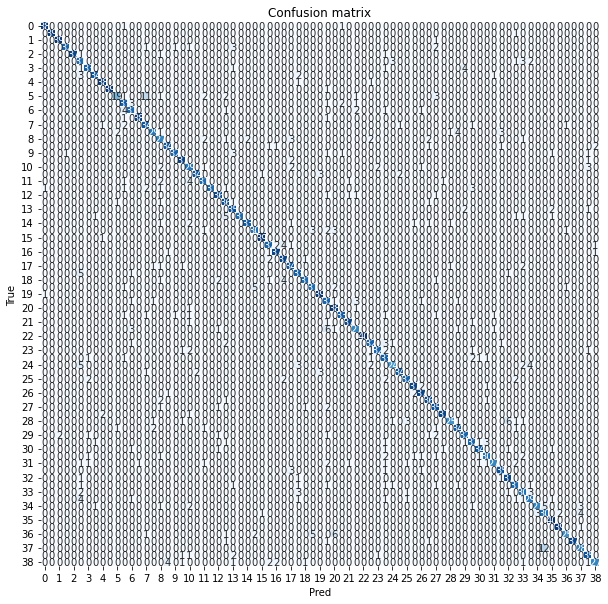

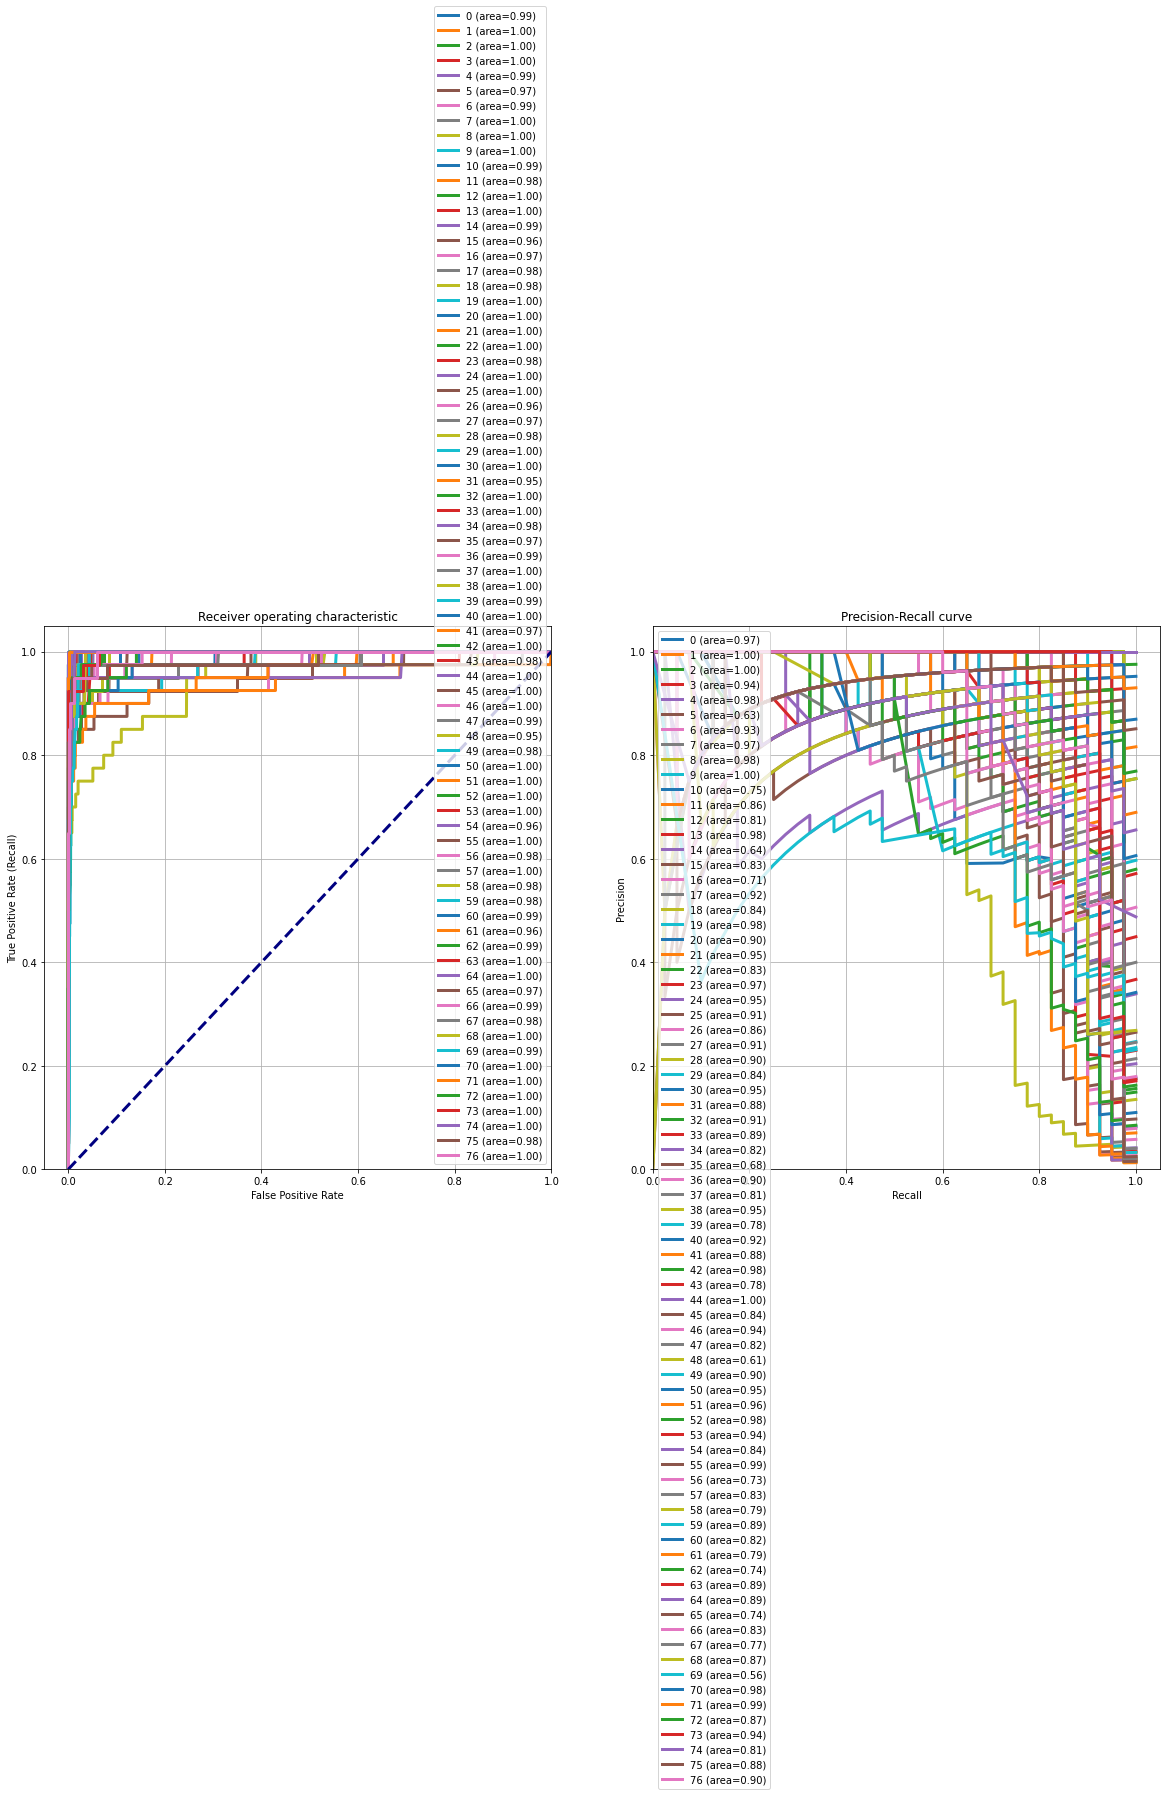

========== EXPORTING MODEL ==========


In [ ]:
basic.driver('banking_basic')

========== TRAINING VECTORS ==========
========== TRAINING MODEL ==========
========== TRAINING REPORT ==========
0.9784323040380047
0.9791854597898385
0.9782911835216537
========== TESTING REPORT ==========
0.7902222222222223
0.7951962204648432
0.7891586173741584
Accuracy: 0.79
Auc: 0.99
Detail:
                           precision    recall  f1-score   support

      accept_reservations       0.84      0.87      0.85        30
          account_blocked       0.58      0.60      0.59        30
                    alarm       0.97      0.97      0.97        30
       application_status       0.89      0.80      0.84        30
                      apr       1.00      0.90      0.95        30
            are_you_a_bot       0.81      1.00      0.90        30
                  balance       0.68      0.70      0.69        30
             bill_balance       0.70      0.53      0.60        30
                 bill_due       0.25      0.10      0.14        30
              book_flight      

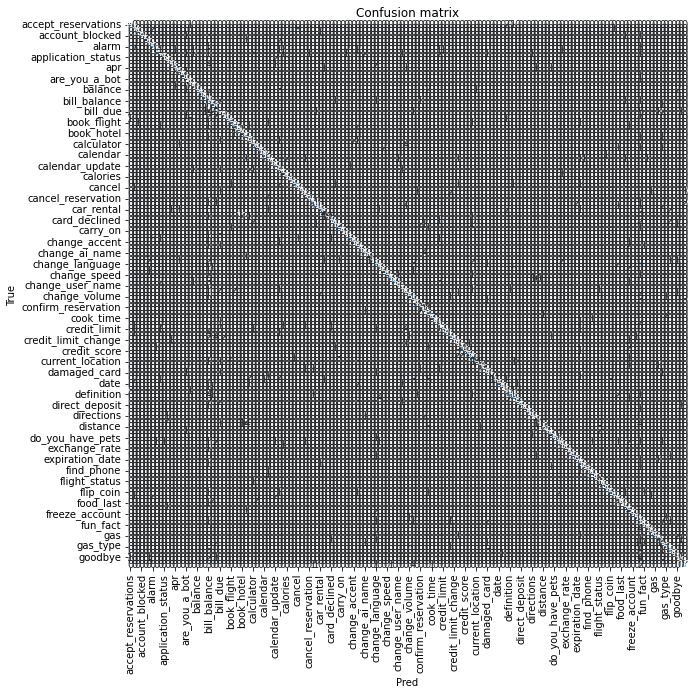

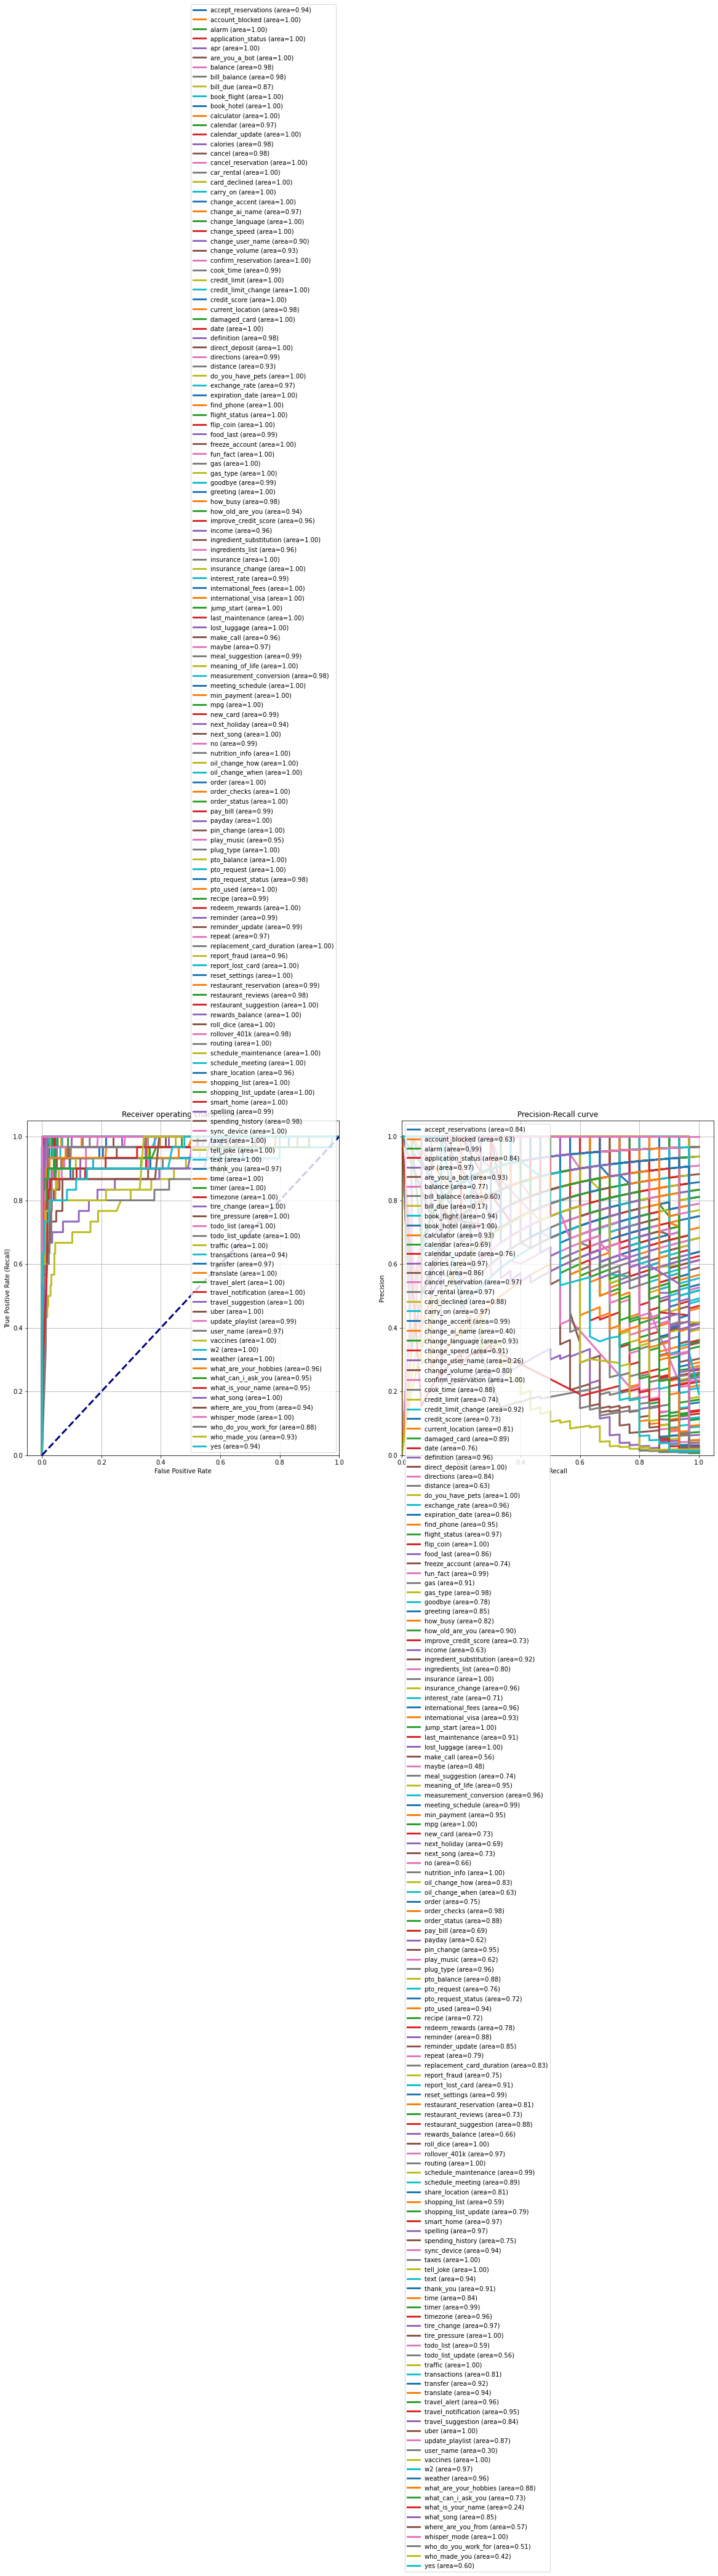

========== VALIDATION REPORT ==========
0.7713333333333333
0.7810666867050962
0.7703180651188697
Accuracy: 0.77
Auc: 0.98
Detail:
                           precision    recall  f1-score   support

      accept_reservations       0.75      0.60      0.67        20
          account_blocked       0.80      0.60      0.69        20
                    alarm       1.00      0.75      0.86        20
       application_status       0.86      0.90      0.88        20
                      apr       1.00      0.90      0.95        20
            are_you_a_bot       0.95      0.90      0.92        20
                  balance       0.56      0.45      0.50        20
             bill_balance       0.77      0.50      0.61        20
                 bill_due       0.57      0.20      0.30        20
              book_flight       0.83      0.75      0.79        20
               book_hotel       0.83      0.75      0.79        20
               calculator       0.93      0.70      0.80        2

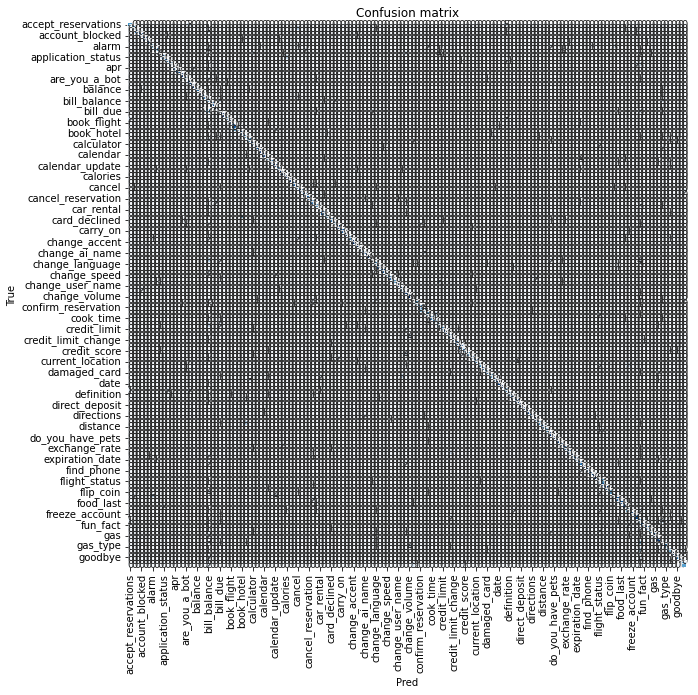

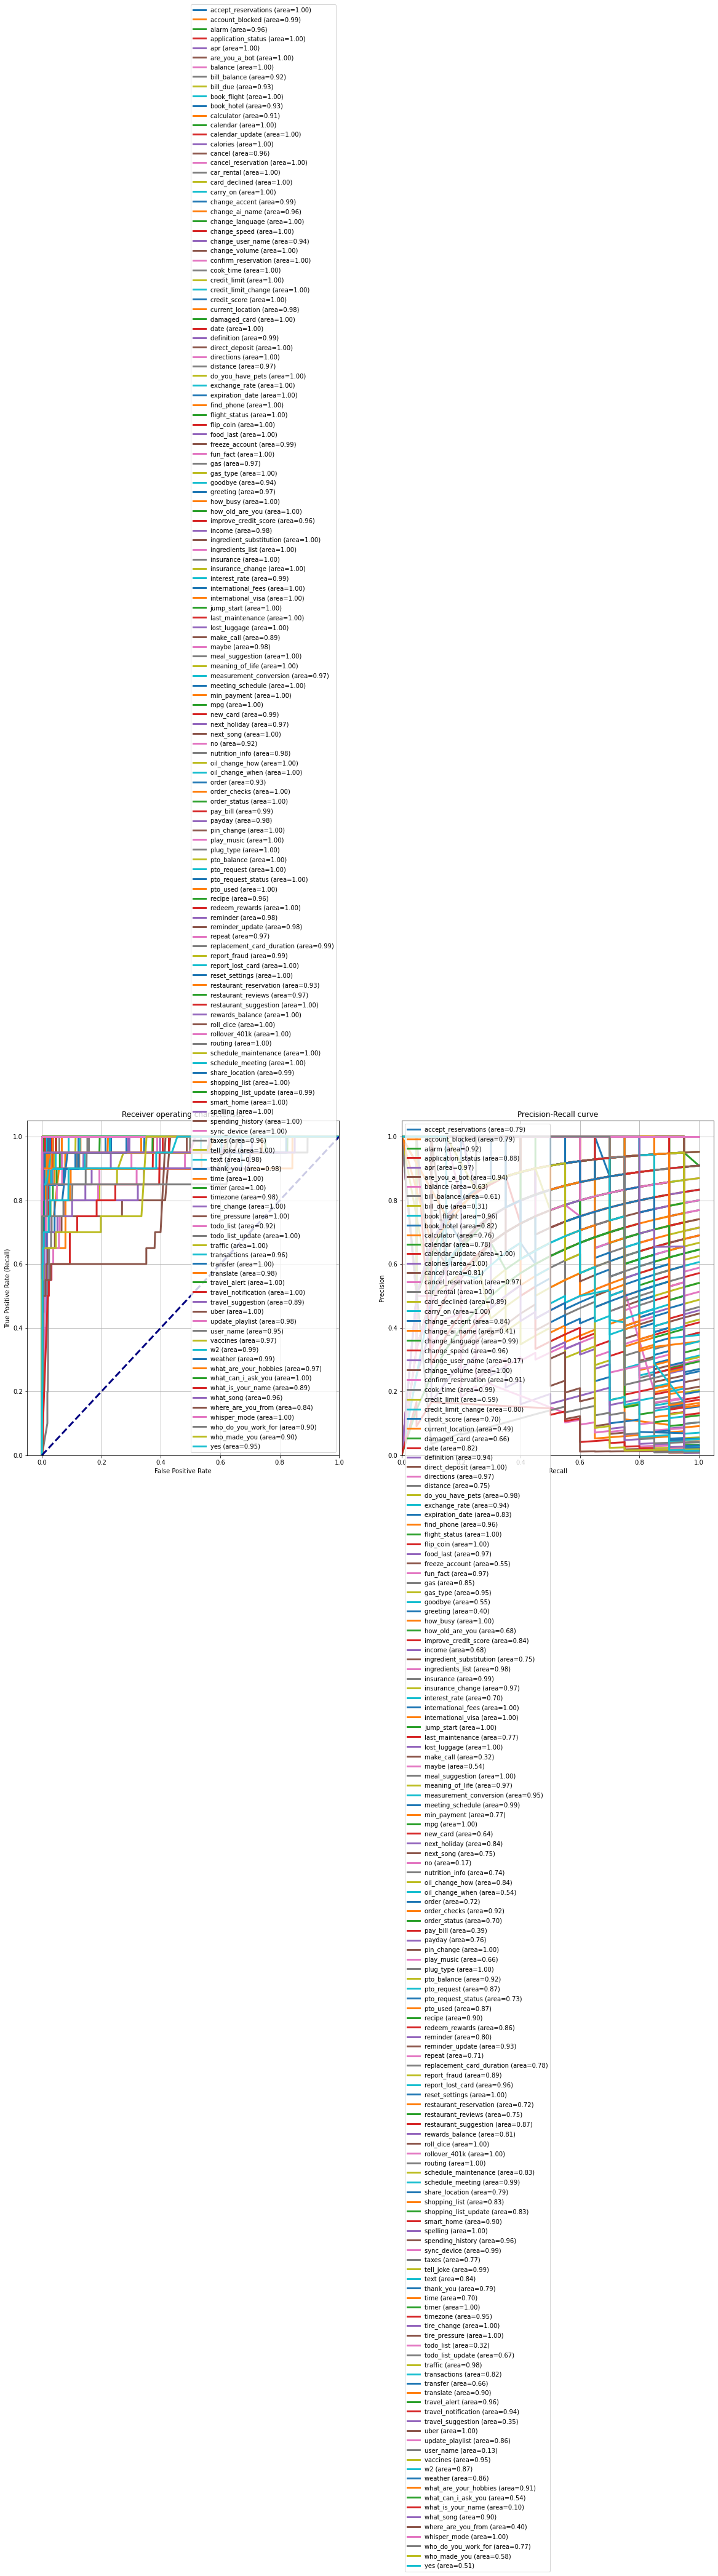

========== EXPORTING MODEL ==========


In [ ]:
basic_clinc = BaseModel(clinc_train, clinc_test, clinc_val, 'labels', 'text')
basic_clinc.driver('clinc')

========== TRAINING VECTORS ==========
========== TRAINING MODEL ==========
========== TRAINING REPORT ==========
0.9740566037735849
0.9743604588609298
0.9734487536266211
Accuracy: 0.97
Auc: 1.0
Detail:
                              precision    recall  f1-score   support

       100_NIGHT_TRIAL_OFFER       1.00      1.00      1.00        18
          ABOUT_SOF_MATTRESS       1.00      1.00      1.00        11
    ACCOUNT_BALANCE_DEDUCTED       1.00      1.00      1.00        11
        ACCOUNT_NOT_VERIFIED       1.00      1.00      1.00         8
                APPRECIATION       1.00      1.00      1.00         9
                 CALL_CENTER       0.95      0.86      0.90        21
                CANCEL_ORDER       1.00      1.00      1.00        22
  CANNOT_SEE_JOINED_CONTESTS       1.00      1.00      1.00        11
                CAPABILITIES       1.00      0.89      0.94         9
        CHANGE_MOBILE_NUMBER       1.00      1.00      1.00        10
 CHANGE_PROFILE_TEAM_DETAI

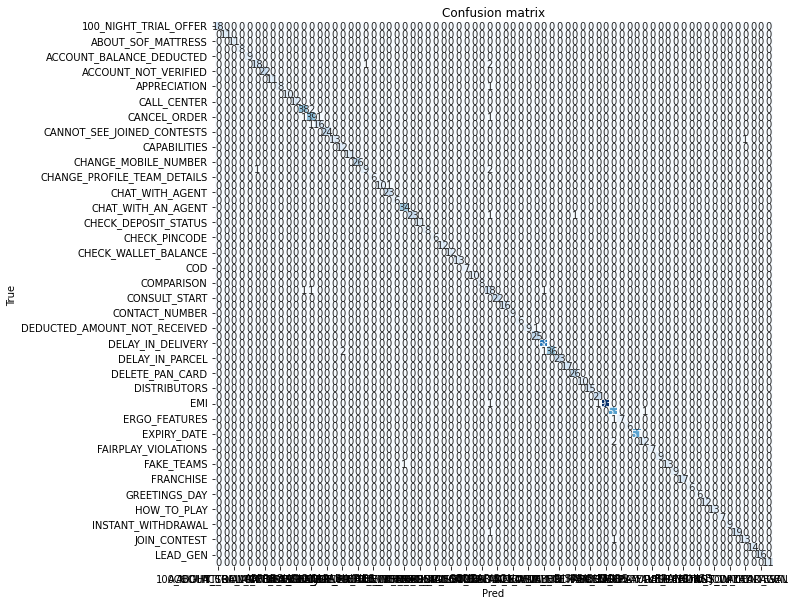

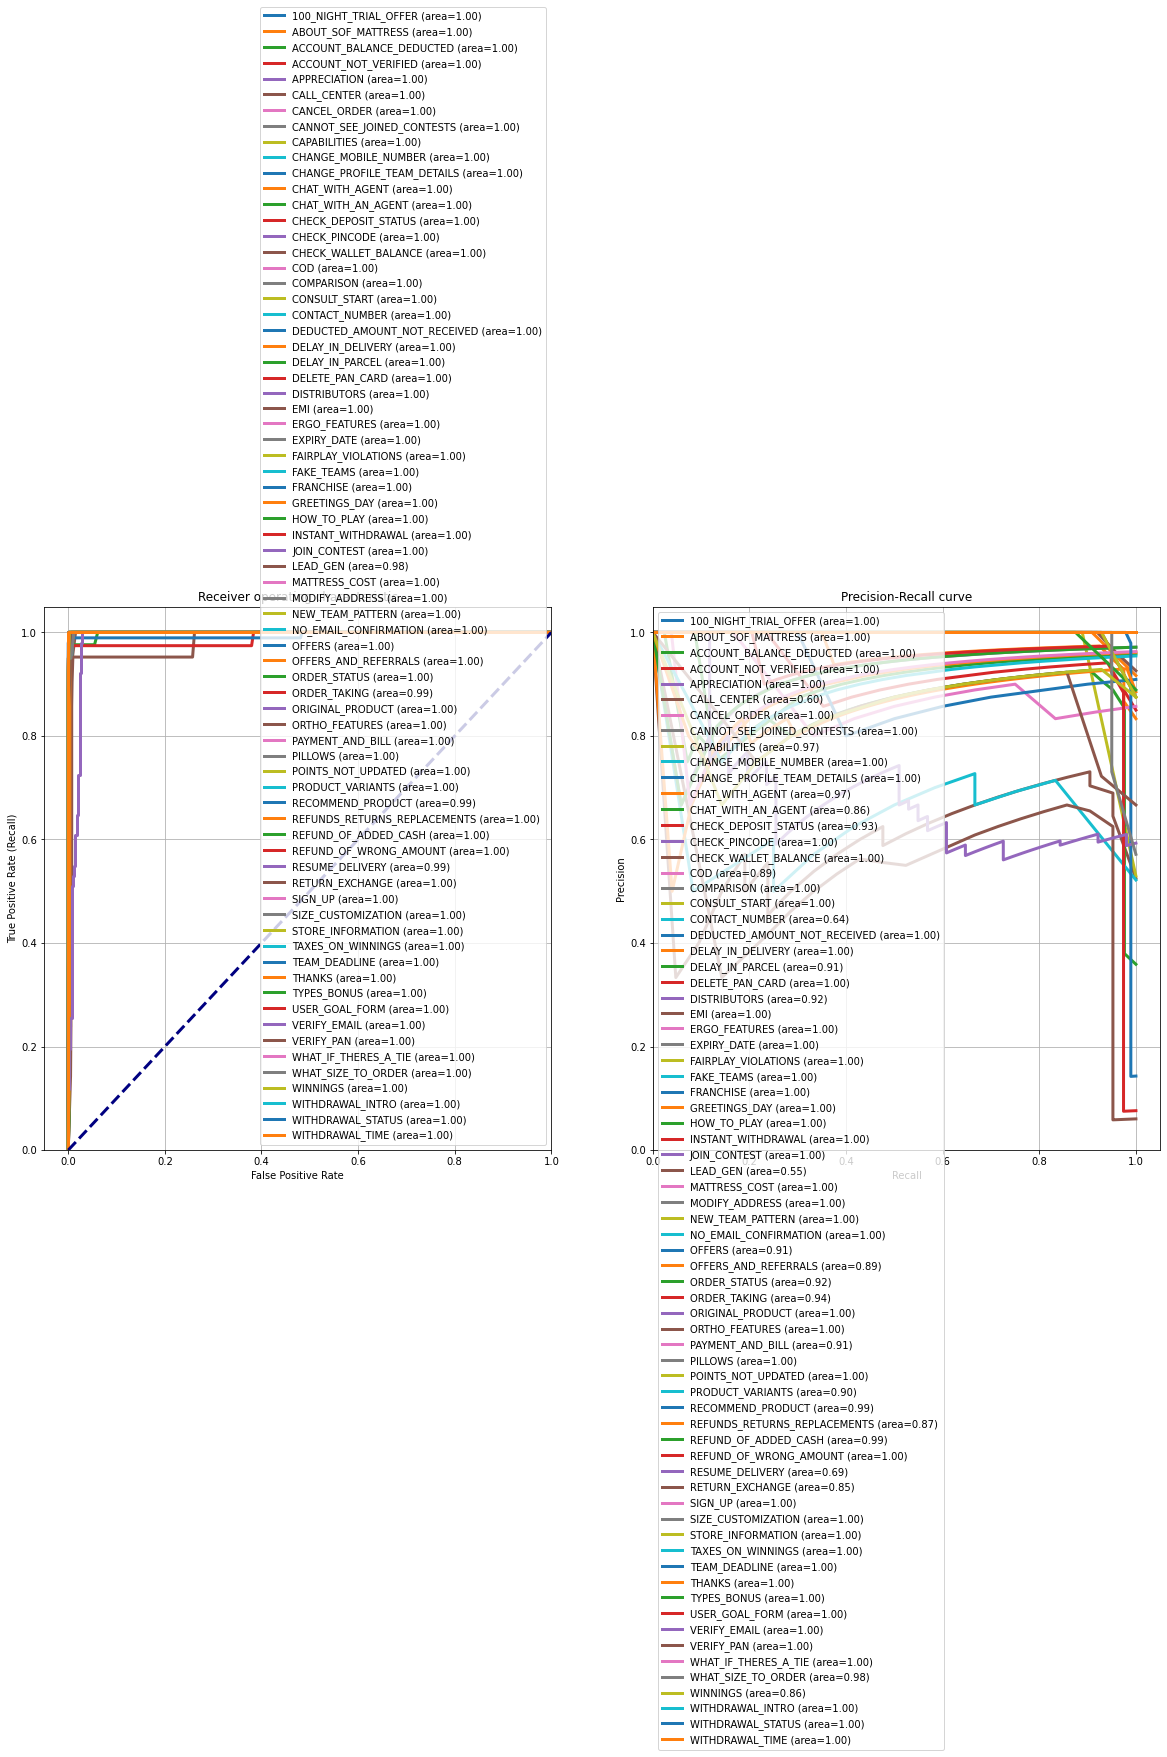

========== TESTING REPORT ==========
0.5711297071129707
0.5731675070224276
0.538383150854811
Accuracy: 0.57
Auc: 0.93
Detail:
                              precision    recall  f1-score   support

       100_NIGHT_TRIAL_OFFER       1.00      0.40      0.57         5
          ABOUT_SOF_MATTRESS       0.17      0.33      0.22         3
    ACCOUNT_BALANCE_DEDUCTED       0.80      0.50      0.62         8
        ACCOUNT_NOT_VERIFIED       1.00      1.00      1.00         3
                APPRECIATION       0.00      0.00      0.00         1
                 CALL_CENTER       0.75      0.60      0.67         5
                CANCEL_ORDER       0.97      0.84      0.90        38
  CANNOT_SEE_JOINED_CONTESTS       0.67      0.67      0.67         3
                CAPABILITIES       0.83      0.62      0.71         8
        CHANGE_MOBILE_NUMBER       0.60      0.60      0.60         5
 CHANGE_PROFILE_TEAM_DETAILS       1.00      0.50      0.67         2
             CHAT_WITH_AGENT     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


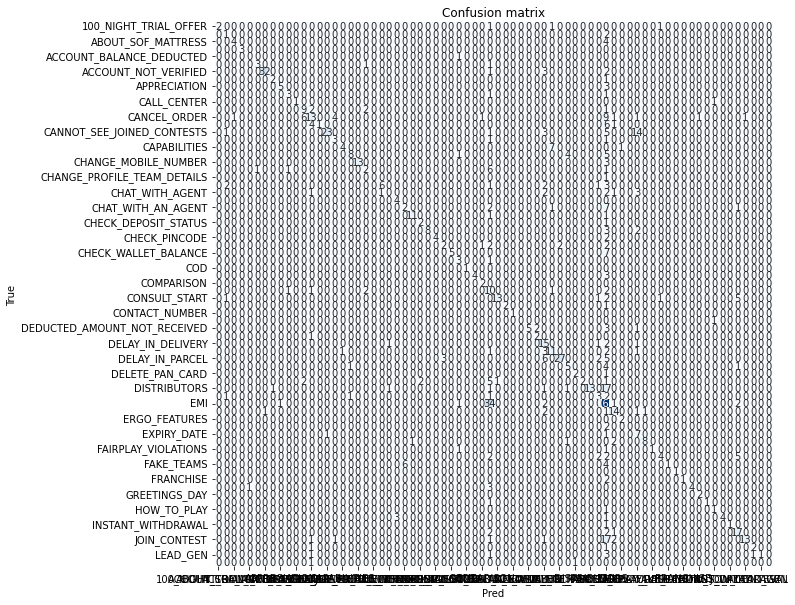

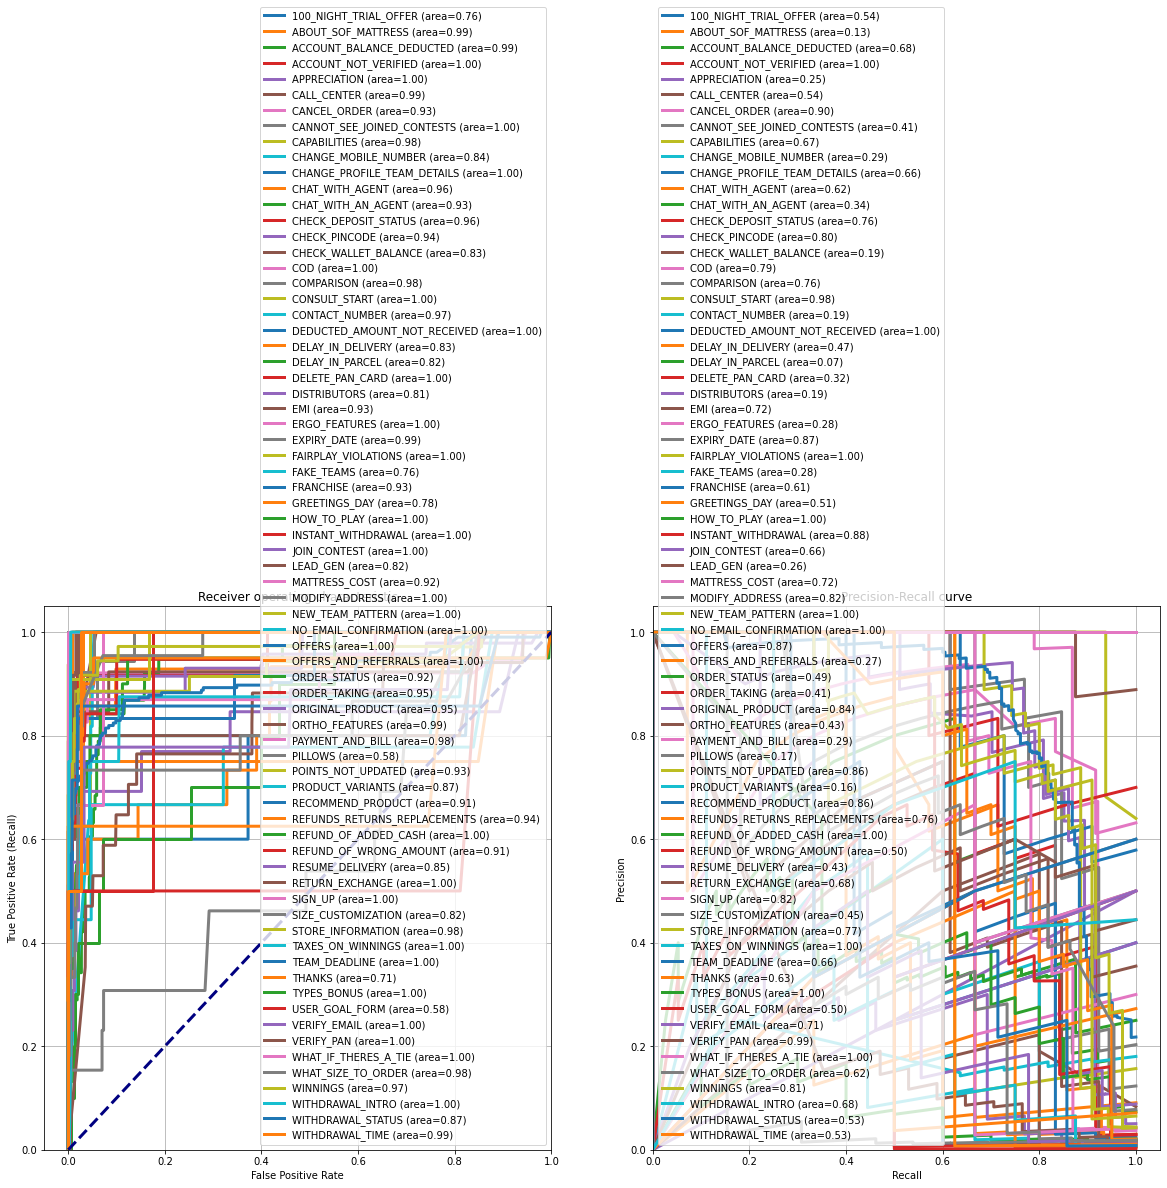

========== EXPORTING MODEL ==========


In [ ]:
basic_haptik = BaseModel(haptik_train, haptik_test, None, 'label', 'sentence')
basic_haptik.driver('haptik')

In [ ]:
# basic_amazon = BaseModel(amazon_train,amazon_test, None, 'intent', 'text')
# basic_amazon.driver('amazon_basic')

# Building embeddings trainer class

In [ ]:
class BaseModelEmbeddings():

    def __init__(self, train, test, val, target, indp):
        
        self.vec = embed
        self.model = SVC(probability=True)
        self.train_X = train[indp]
        self.train_y = train[target].values
        self.test = test
        if self.test is not None:    
            self.test_X = test[indp]
            self.test_y = test[target].values
        self.val = val
        if self.val is not None:
            self.val_X = val[indp]
            self.val_y = val[target].values
        self.le = LabelEncoder()
        self.param = {
            'kernel':('linear', 'rbf', 'poly'),
            'C': [0.001, 0.01, 0.1, 1, 10],
            'gamma': [0.001, 0.01, 0.1, 1, 10]
        }
        self.grid = GridSearchCV(self.model, self.param, cv=2)


    def train_vect(self):
        try:
            self.train_vec = self.vec(self.train_X).numpy()
            if self.test is not None:
                self.test_vec = self.vec(self.test_X).numpy()
            if self.val is not None:
                self.val_vec = self.vec(self.val_X).numpy()
        except Exception as e:
            print('Umable to Train because of', e)

    def train_model(self):
        self.grid.fit(self.train_vec, self.train_y)
        self.model = self.grid.best_estimator_
    
    def print_performace(self):
        
        pred_train = self.model.predict(self.train_vec)
        preds_train_proba = self.model.predict_proba(self.train_vec)

        print("="*10, 'TRAINING REPORT', "="*10)
        print(accuracy_score(self.train_y, pred_train))
        print(f1_score(self.train_y, pred_train, average='weighted'))
        print(matthews_corrcoef(self.train_y, pred_train))
        plot_metrics(self.train_y, pred_train, preds_train_proba)

        if self.test is not None:
            preds_test = self.model.predict(self.test_vec)
            preds_test_proba = self.model.predict_proba(self.test_vec)
            print("="*10, 'TESTING REPORT', "="*10)
            print(accuracy_score(self.test_y, preds_test))
            print(f1_score(self.test_y, preds_test, average='weighted'))
            print(matthews_corrcoef(self.test_y, preds_test))
            plot_metrics(self.test_y, preds_test, preds_test_proba)
            
        if self.val is not None:
            preds_val = self.model.predict(self.val_vec)
            preds_val_proba = self.model.predict_proba(self.val_vec)
            print("="*10, 'VALIDATION REPORT', "="*10)
            print(accuracy_score(self.val_y, preds_val))
            print(f1_score(self.val_y, preds_val, average='weighted'))
            print(matthews_corrcoef(self.val_y, preds_val))
            plot_metrics(self.val_y, preds_val, preds_val_proba)
    
    def driver(self, model_name):
        print("="*10, 'TRAINING VECTORS', "="*10)
        self.train_vect()
        print("="*10, 'TRAINING MODEL', "="*10)
        self.train_model()
        self.print_performace()
        print("="*10, 'EXPORTING MODEL', "="*10)
        pickle.dump(self.model, open(f"MODEL/{model_name}.pickle", 'wb'))

# training embedding models

In [ ]:
basic_banking_embeddings = BaseModelEmbeddings(bank_train_df, bank_test_df, None, 'labels', 'text')
basic_banking_embeddings.driver('bank_embeddings')

========== TRAINING VECTORS ==========
========== TRAINING MODEL ==========
========== TRAINING REPORT ==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00       126
           3       1.00      1.00      1.00        87
           4       1.00      1.00      1.00       127
           5       1.00      1.00      1.00       171
           6       1.00      1.00      1.00       181
           7       1.00      1.00      1.00       156
           8       1.00      1.00      1.00       157
           9       1.00      1.00      1.00       129
          10       1.00      1.00      1.00        59
          11       1.00      1.00      1.00       153
          12       1.00      1.00      1.00       112
          13       1.00      1.00      1.00       139
          14       1.00      1.00      1.00       112
          15       1.

In [ ]:
basic_clinc = BaseModelEmbeddings(clinc_train, clinc_test, clinc_val, 'labels', 'text')
basic_clinc.driver('clinc_embeddings')

========== TRAINING VECTORS ==========
========== TRAINING MODEL ==========
========== TRAINING REPORT ==========
                           precision    recall  f1-score   support

      accept_reservations       1.00      1.00      1.00        75
          account_blocked       1.00      1.00      1.00        25
                    alarm       1.00      1.00      1.00        50
       application_status       1.00      1.00      1.00        25
                      apr       1.00      1.00      1.00        25
            are_you_a_bot       1.00      1.00      1.00       100
                  balance       1.00      1.00      1.00        25
             bill_balance       1.00      1.00      1.00        25
                 bill_due       1.00      1.00      1.00        25
              book_flight       1.00      1.00      1.00       100
               book_hotel       1.00      1.00      1.00       100
               calculator       1.00      1.00      1.00        50
              

========== TRAINING VECTORS ==========
========== TRAINING MODEL ==========
========== TRAINING REPORT ==========
0.9960691823899371
0.9959954089468444
0.9959769701127921
Accuracy: 1.0
Auc: 1.0
Detail:
                              precision    recall  f1-score   support

       100_NIGHT_TRIAL_OFFER       1.00      1.00      1.00        18
          ABOUT_SOF_MATTRESS       1.00      1.00      1.00        11
    ACCOUNT_BALANCE_DEDUCTED       1.00      1.00      1.00        11
        ACCOUNT_NOT_VERIFIED       1.00      1.00      1.00         8
                APPRECIATION       1.00      1.00      1.00         9
                 CALL_CENTER       0.95      1.00      0.98        21
                CANCEL_ORDER       1.00      1.00      1.00        22
  CANNOT_SEE_JOINED_CONTESTS       1.00      1.00      1.00        11
                CAPABILITIES       1.00      1.00      1.00         9
        CHANGE_MOBILE_NUMBER       1.00      1.00      1.00        10
 CHANGE_PROFILE_TEAM_DETAIL

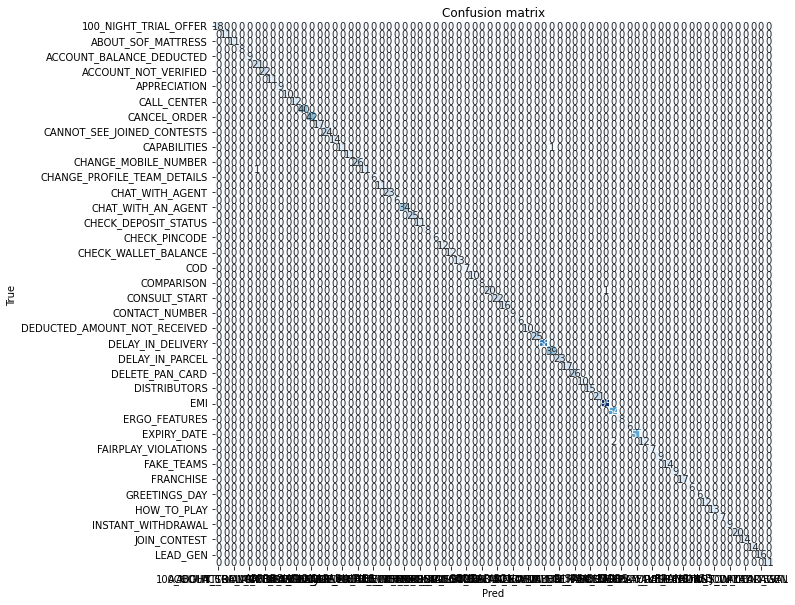

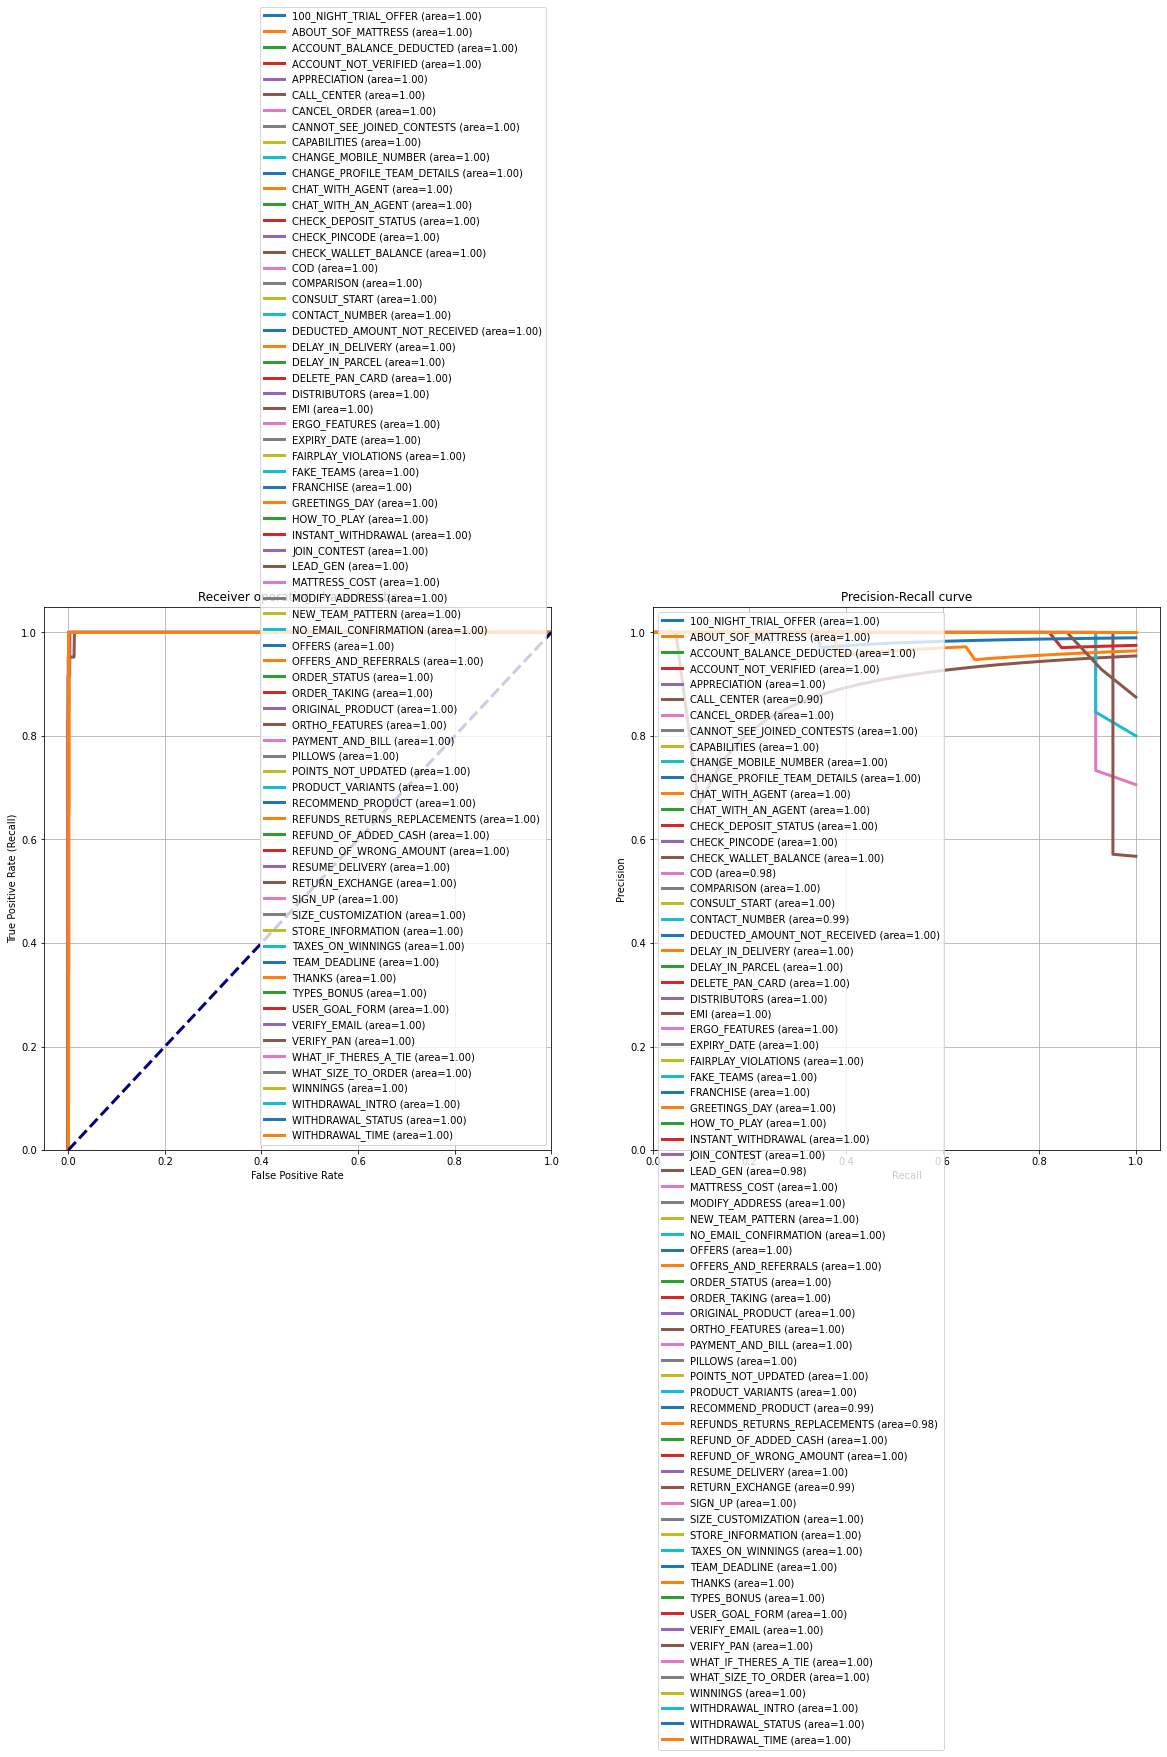

========== TESTING REPORT ==========
0.6903765690376569
0.7010962558298037
0.671677707834151
Accuracy: 0.69
Auc: 0.99
Detail:
                              precision    recall  f1-score   support

       100_NIGHT_TRIAL_OFFER       0.45      1.00      0.62         5
          ABOUT_SOF_MATTRESS       0.50      0.33      0.40         3
    ACCOUNT_BALANCE_DEDUCTED       0.88      0.88      0.88         8
        ACCOUNT_NOT_VERIFIED       1.00      1.00      1.00         3
                APPRECIATION       1.00      1.00      1.00         1
                 CALL_CENTER       0.57      0.80      0.67         5
                CANCEL_ORDER       1.00      0.92      0.96        38
  CANNOT_SEE_JOINED_CONTESTS       0.27      1.00      0.43         3
                CAPABILITIES       1.00      0.50      0.67         8
        CHANGE_MOBILE_NUMBER       0.75      0.60      0.67         5
 CHANGE_PROFILE_TEAM_DETAILS       1.00      0.50      0.67         2
             CHAT_WITH_AGENT     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



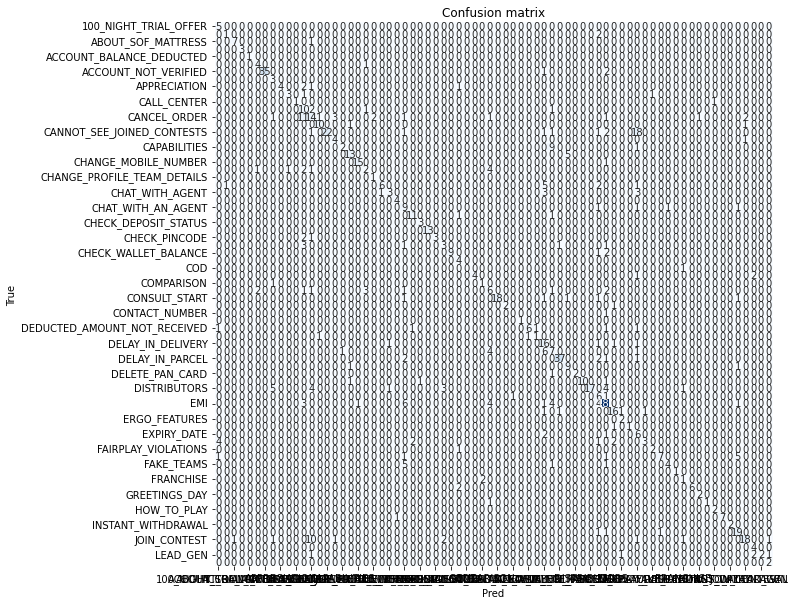

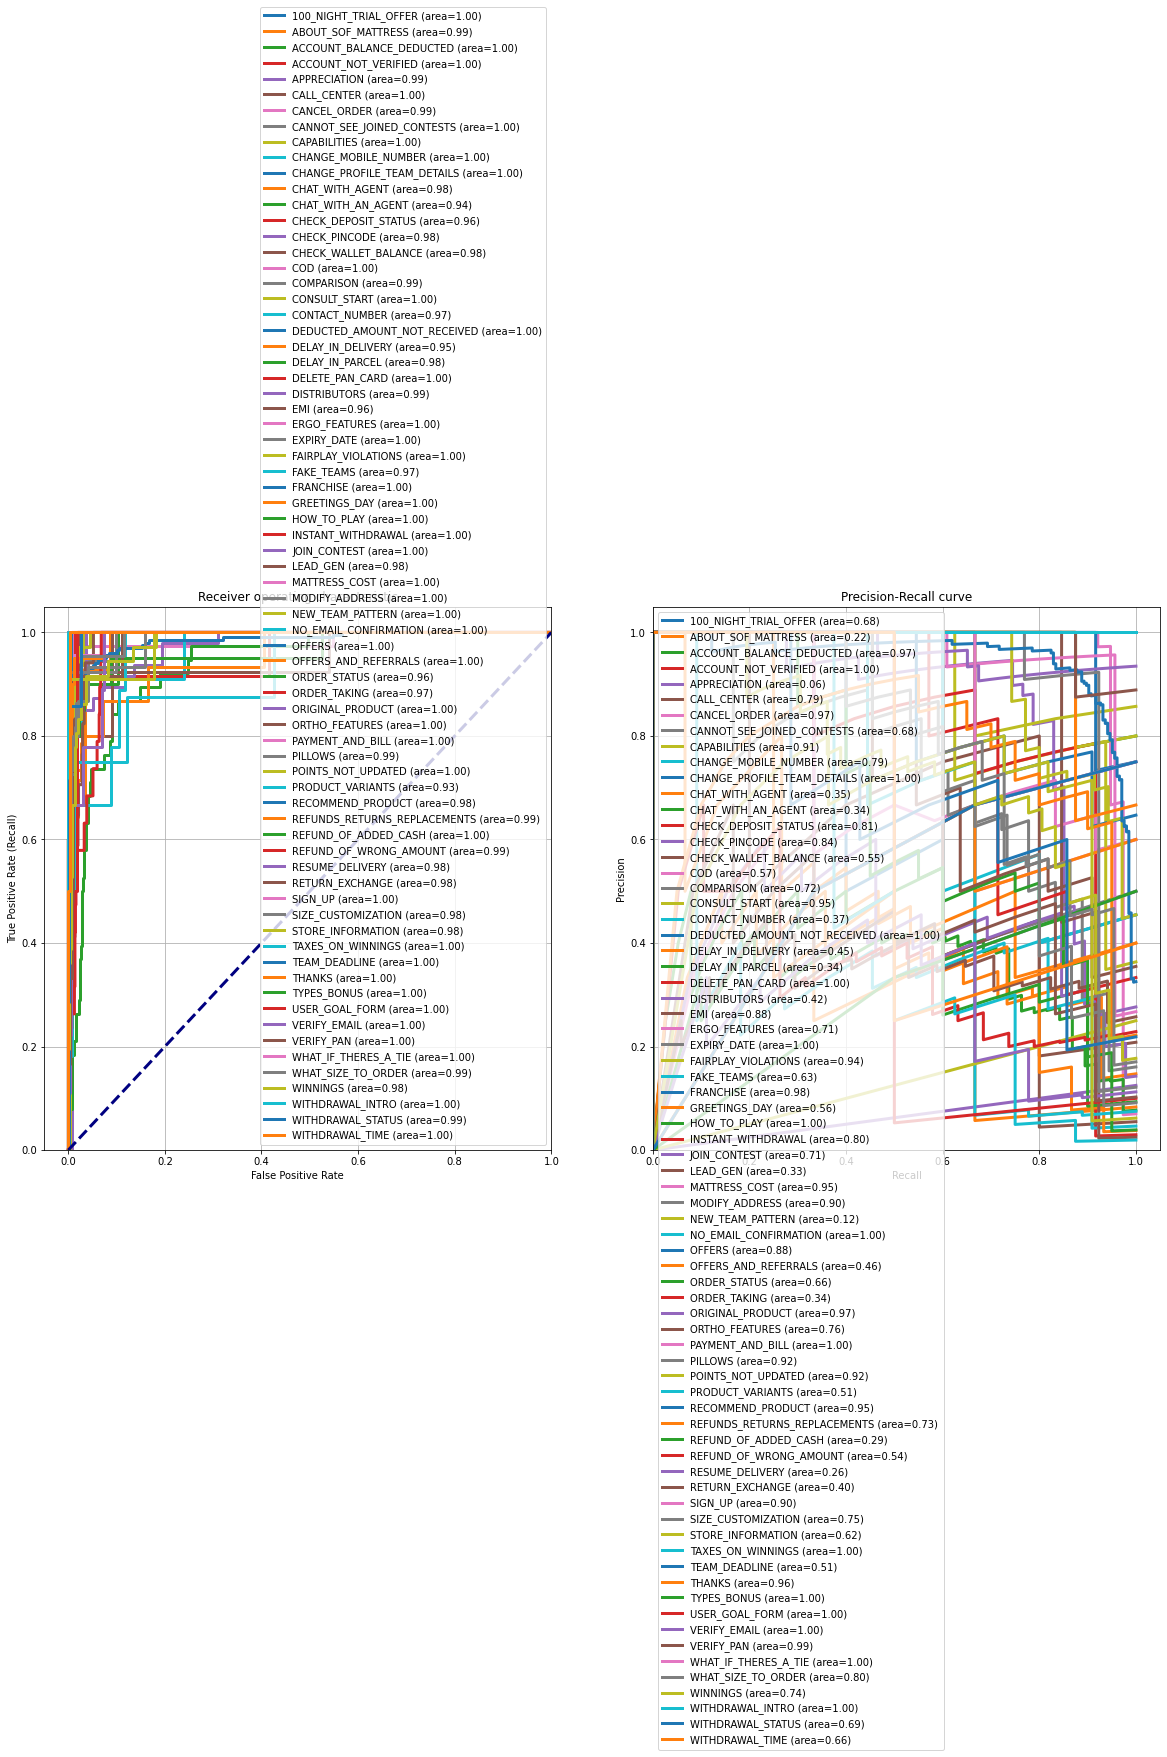

========== EXPORTING MODEL ==========


In [ ]:
basic_live = BaseModelEmbeddings(haptik_train, haptik_test, None, 'label', 'sentence')
basic_live.driver('haptik_embeddings')

In [ ]:
basic_hmu_embed = BaseModelEmbeddings(hwu_train_df, hwu_test_df, hwu_val_df, 'Intents', 'label')
basic_hmu_embed.driver('hwu_basic_embed')

## PLOTTING DATA POINTS

In [ ]:
plot_data = pd.read_csv('VF.csv')

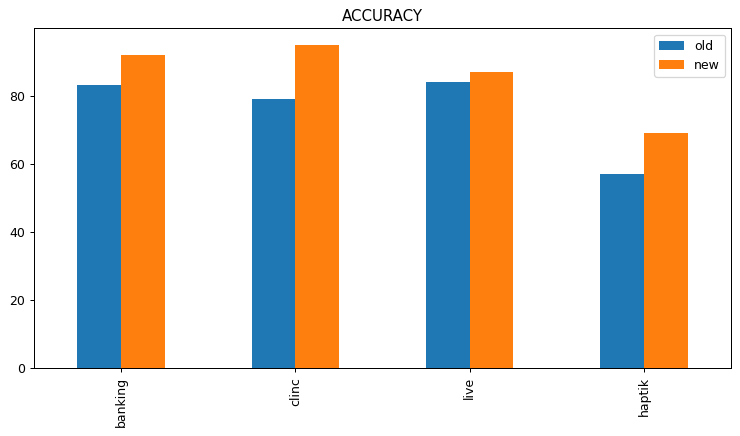

In [ ]:
ax=plot_data[plot_data['metrics']=='Accuracy'][['old','new']].plot.bar(figsize=[10,5], title='ACCURACY')
ax.set_xticklabels(plot_data['data'].unique())
plt.rcParams["figure.dpi"] = 90

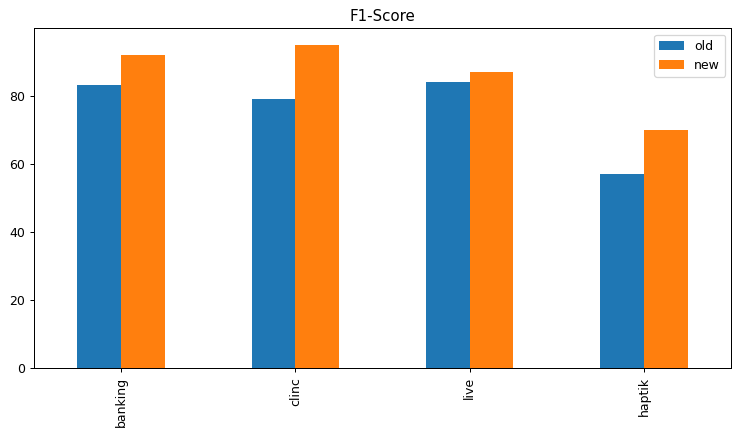

In [ ]:
ax=plot_data[plot_data['metrics']=='F1-Score'][['old','new']].plot.bar(figsize=[10,5], title='F1-Score')
ax.set_xticklabels(plot_data['data'].unique())
plt.rcParams["figure.dpi"] = 90

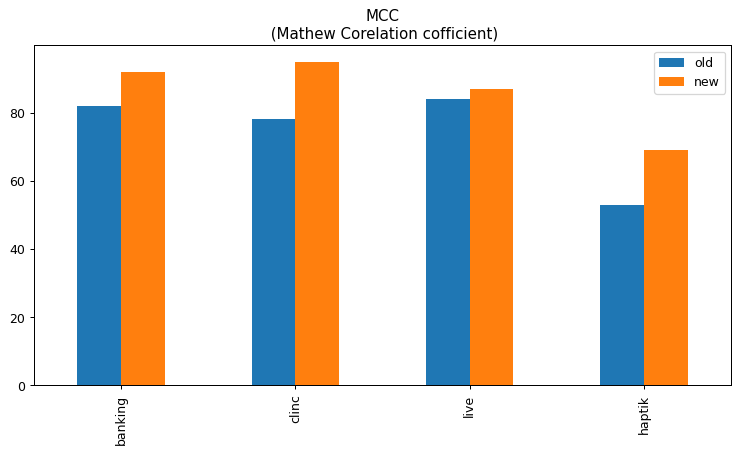

In [ ]:
ax=plot_data[plot_data['metrics']=='MCC\n (Mathew Corelation cofficient)'][['old','new']].plot.bar(figsize=[10,5], title='MCC\n (Mathew Corelation cofficient)')
ax.set_xticklabels(plot_data['data'].unique())
plt.rcParams["figure.dpi"] = 80

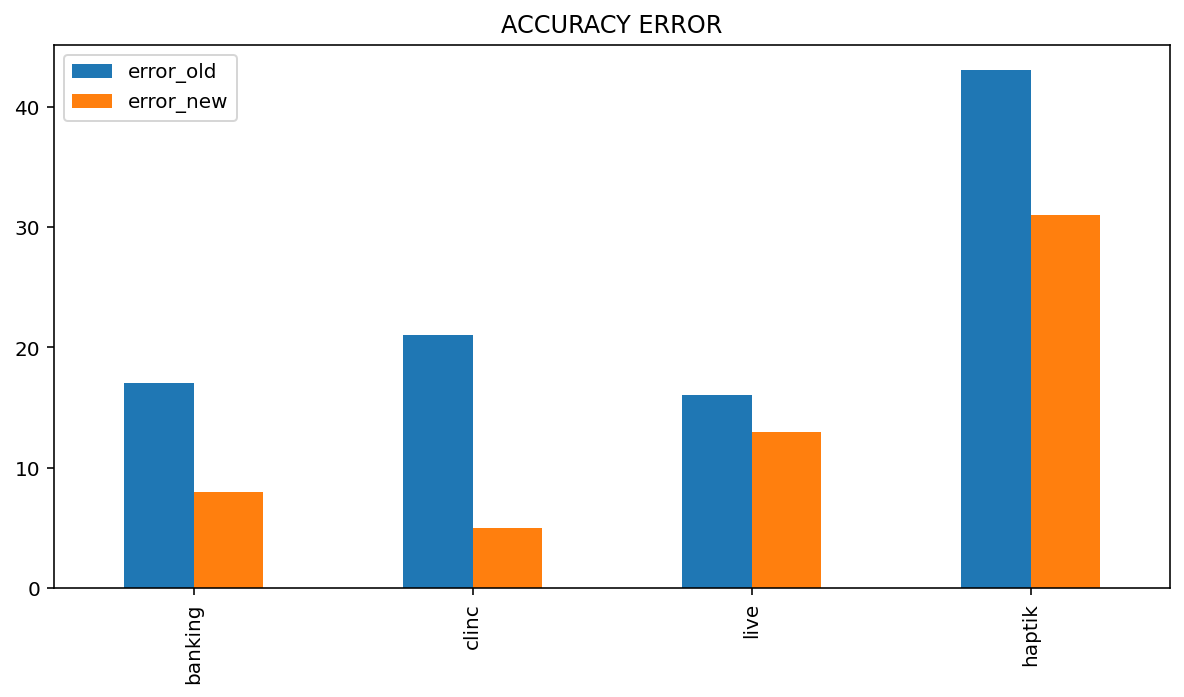

In [ ]:
ax=plot_data[plot_data['metrics']=='Accuracy'][['error_old','error_new']].plot.bar(figsize=[10,5], title='ACCURACY ERROR')
ax.set_xticklabels(plot_data['data'].unique())
plt.rcParams["figure.dpi"] = 90

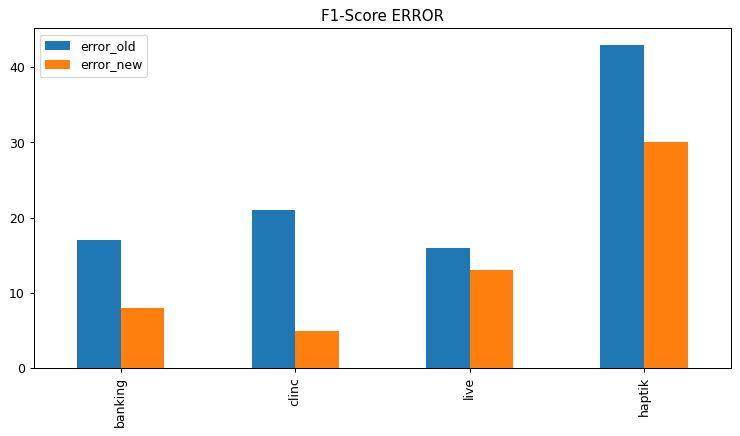

In [ ]:
ax=plot_data[plot_data['metrics']=='F1-Score'][['error_old','error_new']].plot.bar(figsize=[10,5], title='F1-Score ERROR')
ax.set_xticklabels(plot_data['data'].unique())
plt.rcParams["figure.dpi"] = 90

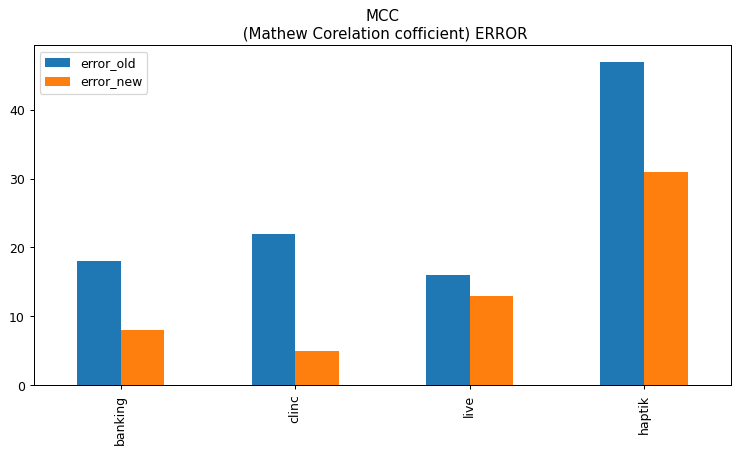

In [ ]:
ax=plot_data[plot_data['metrics']=='MCC\n (Mathew Corelation cofficient)'][['error_old','error_new']].plot.bar(figsize=[10,5], title='MCC\n (Mathew Corelation cofficient) ERROR')
ax.set_xticklabels(plot_data['data'].unique())
plt.rcParams["figure.dpi"] = 90

In [ ]:
# plot_data[plot_data['metrics']=='F1-Score'][['error_old','error_new']]

In [ ]:
# plot_data[plot_data['metrics']=='Accuracy'][['error_old','error_new']]